201805032 - Ardıl Silan Aydın
201805016 - Beril Kartal
201805060 - Elif Yılmaz
201805017 - Neslihan Özdil
201805045 - Orhan Gazi Barak
201805040 - Yusuf Çelikkıran

Checking and improving column names

In [2]:
import pandas as pd

# Verisetini yükle
data = pd.read_csv("isedataset.csv")

# Sütun isimlerini yazdır
print(data.columns)


Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol',
       'Predict', 'Unnamed: 8'],
      dtype='object')


In [6]:
import pandas as pd

# Verisetini yükle
data = pd.read_csv("isedataset.csv")

# Sütun isimlerini belirle
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol', 'Predict','Predict2']
# Sütun sil
data.drop("Predict2", axis=1, inplace=True)

# Sütun isimlerini yazdır
print(data.columns)
data.to_csv("isedataset_uptade.csv", index=False)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol', 'Predict'], dtype='object')


Converting data to numeric

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Veri setini yükle
data = pd.read_csv("isedataset_uptade.csv")

# Tarih sütununu datetime nesnesine dönüştür
data['Date'] = pd.to_datetime(data['Date'])

# Tarih özelliklerini ayır
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop("Date", axis=1, inplace=True)

# LabelEncoder oluştur
label_encoder = LabelEncoder()

# Symbol sütununu label encoding uygula
data['Symbol_Encoded'] = label_encoder.fit_transform(data['Symbol'])
data.drop("Symbol", axis=1, inplace=True)

# "Predict" sütununu veri setinden çıkar
predict_column = data.pop("Predict")

# "Predict" sütununu en sona ekle
data["Predict"] = predict_column

# Sonucu yazdır
print(data.head())

# Veriyi yeni CSV dosyasına kaydet
data.to_csv("Numeric_isedataset.csv", index=False)


        Open       High        Low      Close    Volume  Year  Month  Day  \
0  27.500000  27.500000  27.500000  27.500000    262214  2023      6   15   
1  30.240000  30.240000  30.240000  30.240000   1169499  2023      6   16   
2  31.000000  31.100000  29.940001  29.940001   8064437  2023      6   20   
3  26.959999  26.959999  26.959999  26.959999   2147415  2023      6   21   
4  25.620001  27.620001  25.500000  25.940001  71898180  2023      6   22   

   Symbol_Encoded    Predict  
0               0  30.240000  
1               0  29.940001  
2               0  26.959999  
3               0  25.940001  
4               0  25.900000  


Creating new features

In [14]:
import pandas as pd

# Veri setini yükle
data = pd.read_csv("Numeric_isedataset.csv")

# Hareketli Ortalama (Moving Average) hesaplama
data['5_Day_Average'] = data.groupby('Symbol_Encoded')['Close'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
data['10_Day_Average'] = data.groupby('Symbol_Encoded')['Close'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

# Günlük Fiyat Değişimi (Daily Price Change) hesaplama
data['Daily_Price_Change'] = data.groupby('Symbol_Encoded')['Close'].transform(lambda x: x.pct_change())

# Hacim İstatistikleri hesaplama
data['Average_Volume'] = data.groupby('Symbol_Encoded')['Volume'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
data['Maximum_Volume'] = data.groupby('Symbol_Encoded')['Volume'].transform(lambda x: x.rolling(window=5, min_periods=1).max())
data['Minimum_Volume'] = data.groupby('Symbol_Encoded')['Volume'].transform(lambda x: x.rolling(window=5, min_periods=1).min())

# Volatilite hesaplama
data['Volatility'] = data.groupby('Symbol_Encoded')['Close'].transform(lambda x: x.rolling(window=5, min_periods=1).std())

# Önceki gün kapanış fiyatı
data['Previous_Day_Close'] = data.groupby('Symbol_Encoded')['Close'].shift(1)

# Relatif Güç Endeksi (Relative Strength Index - RSI)
def rsi(values):
    delta = values.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14, min_periods=1).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = data.groupby('Symbol_Encoded')['Close'].transform(rsi)

# NaN değerleri temizleme
data.dropna(inplace=True)

# Sonucu yazdır
print(data.head())

# Veriyi yeni CSV dosyasına kaydet
data.to_csv("Numeric_isedataset_withNewFeatures.csv", index=False)


        Open       High        Low      Close    Volume  Year  Month  Day  \
1  30.240000  30.240000  30.240000  30.240000   1169499  2023      6   16   
2  31.000000  31.100000  29.940001  29.940001   8064437  2023      6   20   
3  26.959999  26.959999  26.959999  26.959999   2147415  2023      6   21   
4  25.620001  27.620001  25.500000  25.940001  71898180  2023      6   22   
5  26.139999  26.600000  25.700001  25.900000  19922530  2023      6   23   

   Symbol_Encoded    Predict  5_Day_Average  10_Day_Average  \
1               0  29.940001      28.870000       28.870000   
2               0  26.959999      29.226667       29.226667   
3               0  25.940001      28.660000       28.660000   
4               0  25.900000      28.116000       28.116000   
5               0  25.900000      27.796000       27.746667   

   Daily_Price_Change  Average_Volume  Maximum_Volume  Minimum_Volume  \
1            0.099636    7.158565e+05       1169499.0        262214.0   
2           

Standardization and stats

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veri setini yükle
df = pd.read_csv("Numeric_isedataset_withNewFeatures.csv")

# Sadece sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Standartlaştırma işlemi için StandardScaler'ı kullan
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_columns)

# Standartlaştırılmış veriyi DataFrame'e dönüştür
standardized_df = pd.DataFrame(standardized_data, columns=numeric_columns.columns)


# Standartlaştırılmış veriyi CSV dosyasına kaydet
standardized_df.to_csv("standardized_isedataset.csv", index=False)
standardized_df


Open      High       Low     Close    Volume      Year     Month  \
0      -0.038546 -0.038723 -0.038380 -0.038554 -0.309809 -0.432882 -0.165266   
1      -0.038536 -0.038712 -0.038384 -0.038558 -0.121767 -0.432882 -0.165266   
2      -0.038589 -0.038766 -0.038423 -0.038597 -0.283139 -0.432882 -0.165266   
3      -0.038606 -0.038757 -0.038442 -0.038610  1.619132 -0.432882 -0.165266   
4      -0.038599 -0.038770 -0.038439 -0.038611  0.201631 -0.432882 -0.165266   
...          ...       ...       ...       ...       ...       ...       ...   
114395 -0.038844 -0.039021 -0.038681 -0.038855 -0.254404  2.310097 -1.304996   
114396 -0.038846 -0.039022 -0.038683 -0.038857 -0.246743  2.310097 -1.304996   
114397 -0.038847 -0.039022 -0.038683 -0.038853 -0.245244  2.310097 -1.304996   
114398 -0.038845 -0.039020 -0.038681 -0.038851 -0.179529  2.310097 -1.304996   
114399 -0.038843 -0.039017 -0.038678 -0.038850 -0.185710  2.310097 -1.304996   

             Day  Symbol_Encoded   Predict  5_Day_Average  10_Day_Average  \
0       0.043639       -1.725953 -0.037914      -0.041167       -0.044603   
1       0.504852       -1.725953 -0.037951      -0.041161       -0.044597   
2       0.620155       -1.725953 -0.037964      -0.041170       -0.044607   
3       0.735459       -1.725953 -0.037964      -0.041178       -0.044616   
4       0.850762       -1.725953 -0.037964      -0.041182       -0.044622   
...          ...             ...       ...            ...             ...   
114395  0.043639        1.673645 -0.038201      -0.041483       -0.044967   
114396  0.389549        1.673645 -0.038197      -0.041484       -0.044967   
114397  0.504852        1.673645 -0.038195      -0.041484       -0.044967   
114398  0.620155        1.673645 -0.038194      -0.041485       -0.044967   
114399  0.735459        1.673645 -0.038194      -0.041484       -0.044967   

        Daily_Price_Change  Average_Volume  Maximum_Volume  Minimum_Volume  \
0                 2.432918       -0.344201       -0.339627       -0.339898   
1                -0.358623       -0.272701       -0.208493       -0.339898   
2                -2.641957       -0.280129       -0.208493       -0.339898   
3                -1.069858        0.122608        1.005548       -0.339898   
4                -0.145135        0.237382        1.005548       -0.299326   
...                    ...             ...             ...             ...   
114395           -0.565266       -0.226983       -0.202115       -0.211732   
114396           -0.825624       -0.224918       -0.202115       -0.208478   
114397            0.968180       -0.234726       -0.202115       -0.208478   
114398            0.498292       -0.221683       -0.202115       -0.208478   
114399            0.241299       -0.237328       -0.248774       -0.208478   

        Volatility  Previous_Day_Close       RSI  
0        -0.021871           -0.039540  2.347486  
1        -0.021924           -0.039503  1.833829  
2        -0.021903           -0.039507 -0.488495  
3        -0.021877           -0.039548 -0.831742  
4        -0.021847           -0.039562 -0.843187  
...            ...                 ...       ...  
114395   -0.022091           -0.039817  0.400878  
114396   -0.022081           -0.039819 -0.255045  
114397   -0.022083           -0.039822  0.145345  
114398   -0.022085           -0.039818  0.399393  
114399   -0.022079           -0.039816  0.662611  

[114400 rows x 19 columns]

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
df = pd.read_csv("standardized_isedataset.csv")

# Her bir sütun için istatistiksel özet
stats_df = df.describe()

# Yeni CSV dosyasına kaydet
stats_df.to_csv("stats_isedataset.csv", index=False)

# İstatistiksel özet tablosunu göster
stats_df

Open          High           Low         Close        Volume  \
count  1.144000e+05  1.144000e+05  1.144000e+05  1.144000e+05  1.144000e+05   
mean  -3.017897e-16  1.941060e-16  3.714037e-17 -2.773163e-16  2.548197e-16   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -3.892925e-02 -3.910575e-02 -3.876393e-02 -3.893759e-02 -3.417037e-01   
25%   -3.881965e-02 -3.899347e-02 -3.865679e-02 -3.882808e-02 -3.279434e-01   
50%   -3.862620e-02 -3.879402e-02 -3.846808e-02 -3.863481e-02 -2.855387e-01   
75%   -3.812795e-02 -3.828154e-02 -3.798377e-02 -3.813704e-02 -1.276548e-01   
max    1.157220e+02  1.156265e+02  1.157965e+02  1.157076e+02  2.634714e+01   

               Year         Month           Day  Symbol_Encoded       Predict  \
count  1.144000e+05  1.144000e+05  1.144000e+05    1.144000e+05  1.144000e+05   
mean   1.438000e-13 -2.235353e-16 -1.019144e-16    1.420137e-14 -5.127382e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00    1.000004e+00  1.000004e+00   
min   -4.328823e-01 -1.589929e+00 -1.685911e+00   -1.725953e+00 -3.827785e-02   
25%   -4.328823e-01 -1.020064e+00 -8.787876e-01   -8.744158e-01 -3.817247e-02   
50%   -4.328823e-01  1.196667e-01 -7.166443e-02    3.322323e-03 -3.798627e-02   
75%   -4.328823e-01  9.744646e-01  8.507620e-01    8.876108e-01 -3.750627e-02   
max    2.310097e+00  1.544330e+00  1.773188e+00    1.673645e+00  1.110694e+02   

       5_Day_Average  10_Day_Average  Daily_Price_Change  Average_Volume  \
count   1.144000e+05    1.144000e+05        1.144000e+05    1.144000e+05   
mean    1.551504e-17    2.927525e-16        9.400066e-17    1.007125e-16   
std     1.000004e+00    1.000004e+00        1.000004e+00    1.000004e+00   
min    -4.157864e-02   -4.507743e-02       -1.601519e+01   -3.650962e-01   
25%    -4.145610e-02   -4.493711e-02       -5.932093e-01   -3.486805e-01   
50%    -4.123851e-02   -4.468878e-02       -7.462400e-02   -2.999277e-01   
75%    -4.068195e-02   -4.405329e-02        4.997209e-01   -1.269333e-01   
max     1.145794e+02    1.090654e+02        1.387008e+01    1.893881e+01   

       Maximum_Volume  Minimum_Volume    Volatility  Previous_Day_Close  \
count    1.144000e+05    1.144000e+05  1.144000e+05        1.144000e+05   
mean     1.592420e-16   -1.165544e-15 -4.923582e-17       -1.490928e-17   
std      1.000004e+00    1.000004e+00  1.000004e+00        1.000004e+00   
min     -3.618693e-01   -3.516240e-01 -2.210560e-02       -3.990638e-02   
25%     -3.456415e-01   -3.372884e-01 -2.207770e-02       -3.979137e-02   
50%     -2.970659e-01   -2.932099e-01 -2.202653e-02       -3.958822e-02   
75%     -1.225789e-01   -1.309946e-01 -2.186921e-02       -3.906637e-02   
max      1.824998e+01    2.278814e+01  1.355416e+02        1.218055e+02   

                RSI  
count  1.144000e+05  
mean  -2.652647e-16  
std    1.000004e+00  
min   -2.857575e+00  
25%   -7.005876e-01  
50%    2.558549e-02  
75%    7.296960e-01  
max    2.347486e+00

correlation

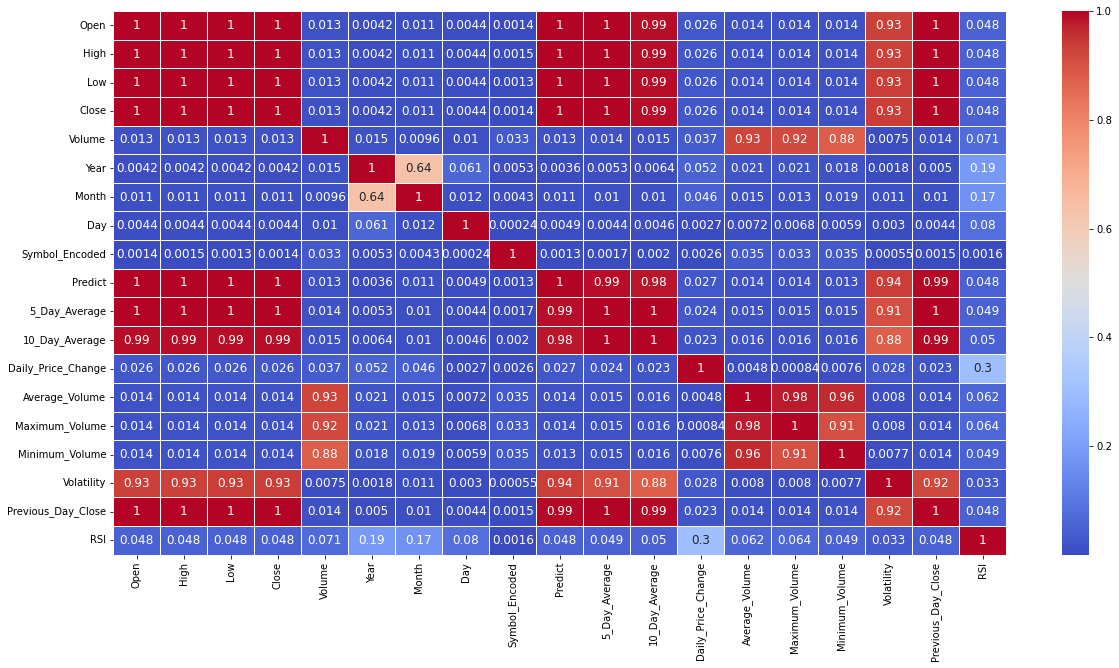

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# final_dataset.csv dosyasını DataFrame'e yükleyin
df = pd.read_csv("standardized_isedataset.csv")

# Sayısal sütunları seçin
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Korelasyon matrisini hesaplayın
correlation_matrix = df[numeric_cols].corr()

# Korelasyon matrisinin her bir öğesinin mutlak değerini alın
absolute_correlation_matrix = correlation_matrix.abs()

# Matristeki değerleri normalize edin (isteğe bağlı olarak)
normalized_correlation_matrix = absolute_correlation_matrix / absolute_correlation_matrix.max().max()

# Korelasyon haritasını çizin
plt.figure(figsize=(20, 10))  # Kutucukları büyütme
sns.heatmap(normalized_correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 12})  # Kutucuk boyutunu belirleme
plt.show()



I created a separate chart for each symbol using the new features I added and the inputs that affect the output values the most. I used Orange to see which inputs had the most impact.

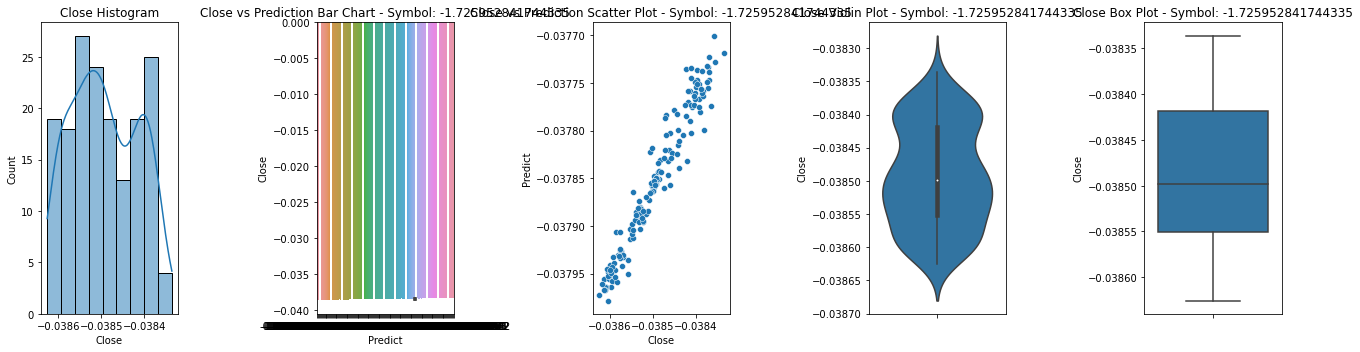

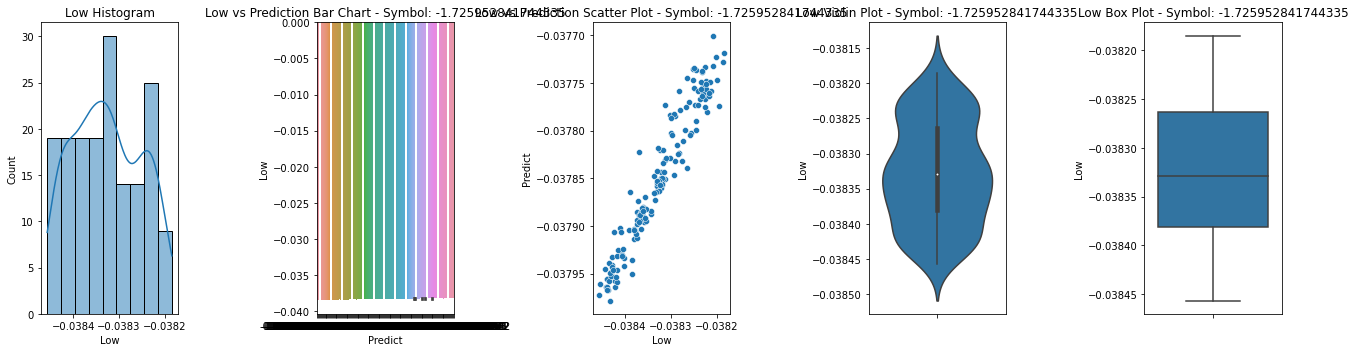

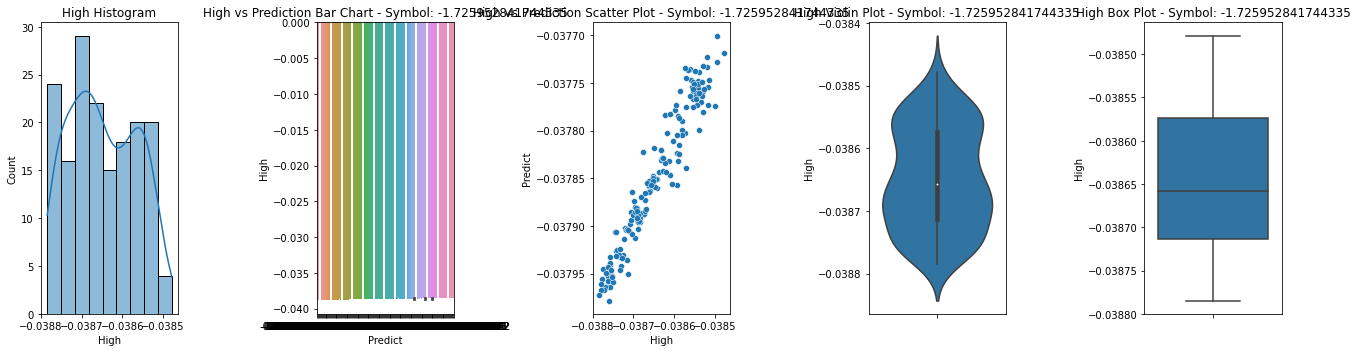

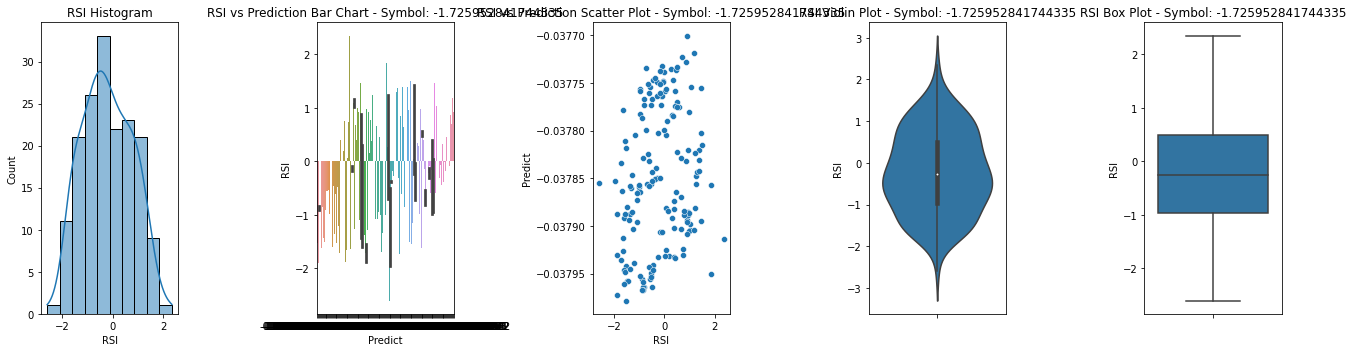

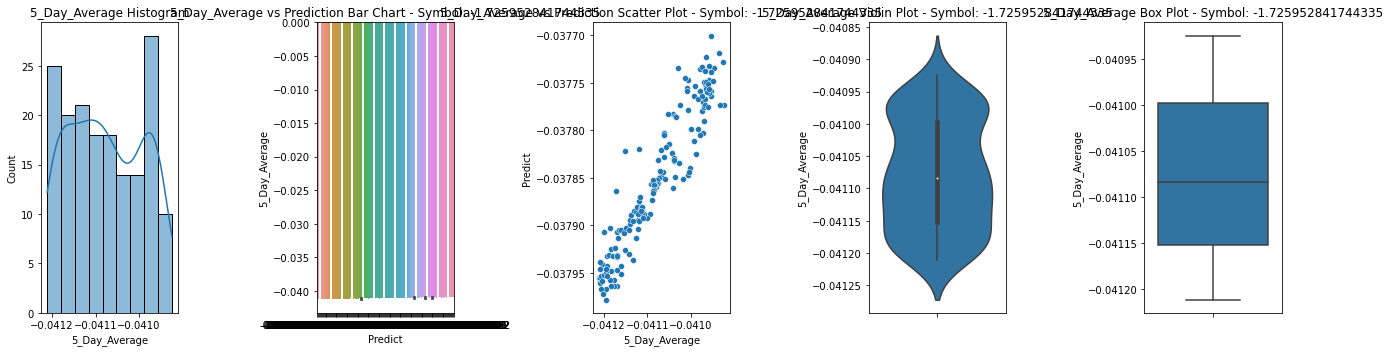

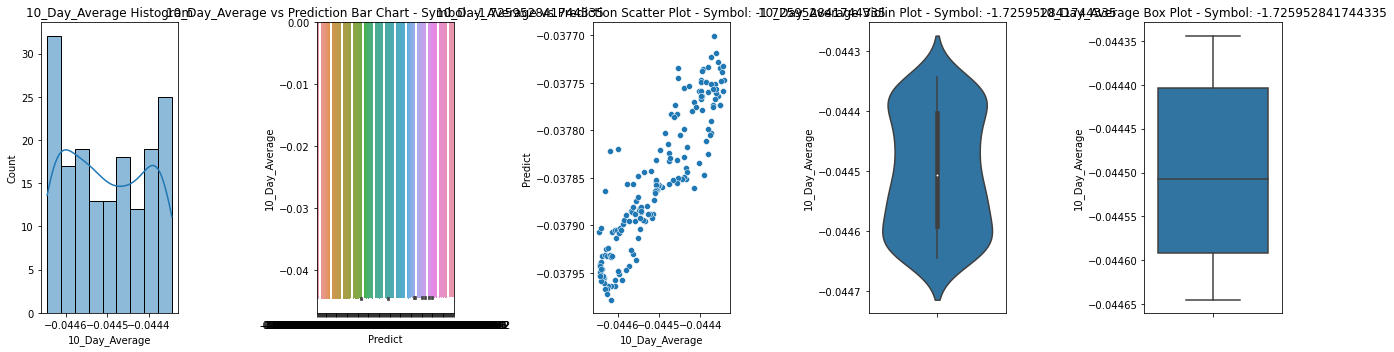

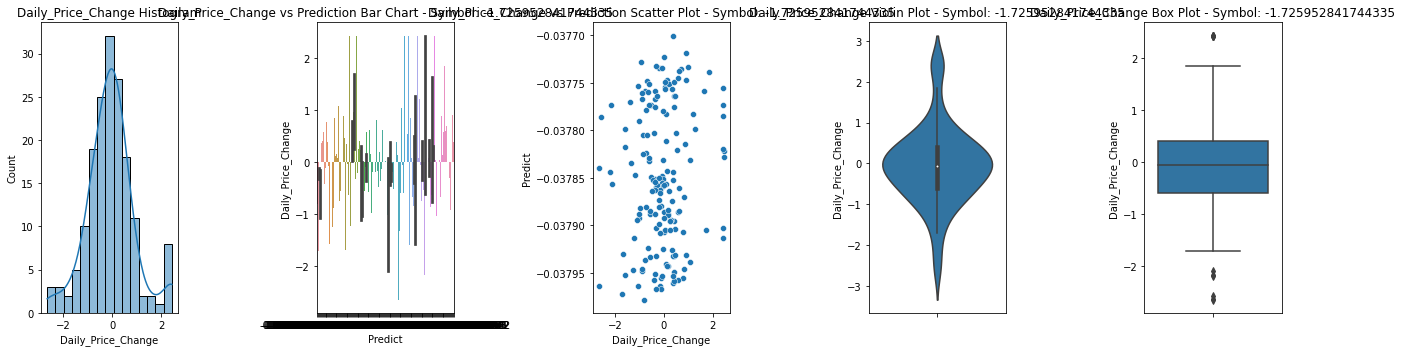

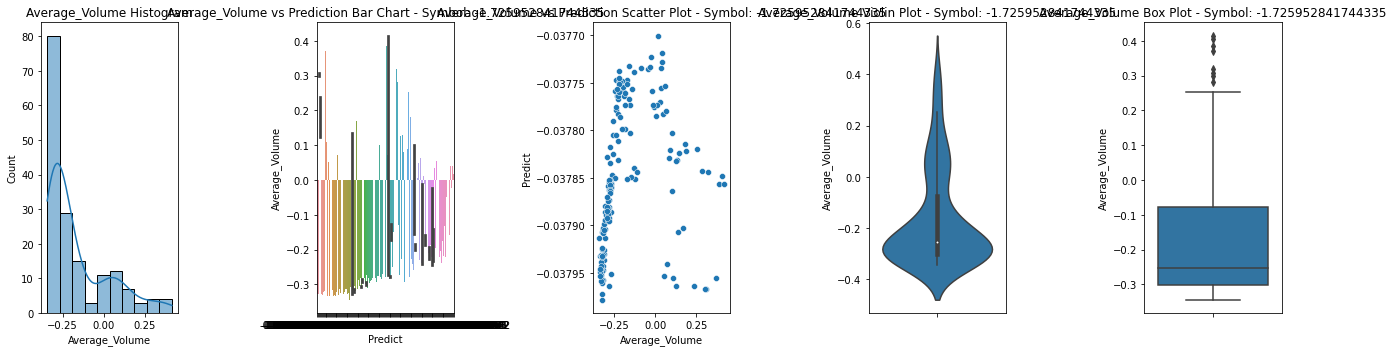

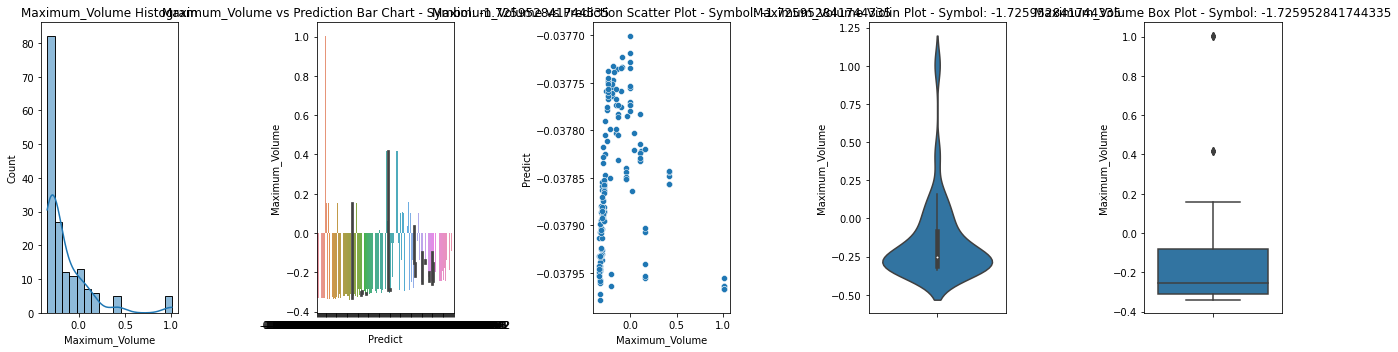

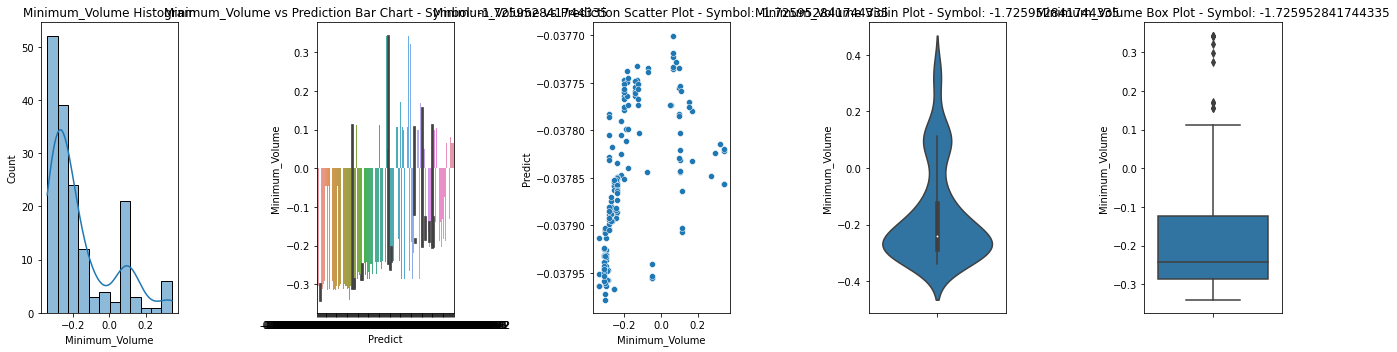

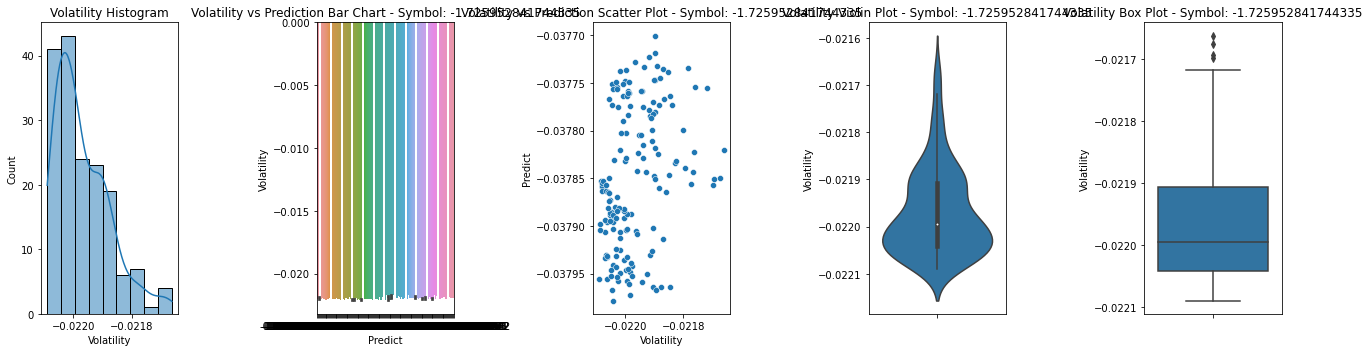

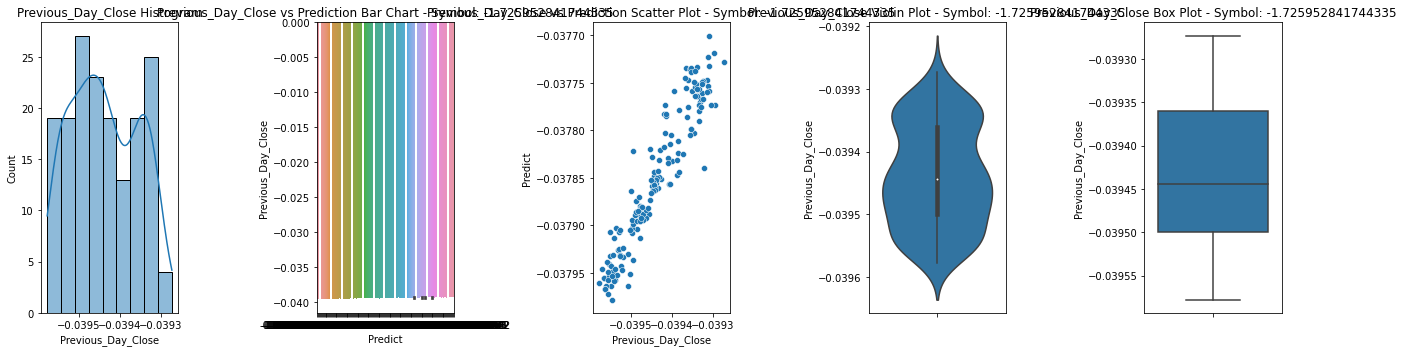

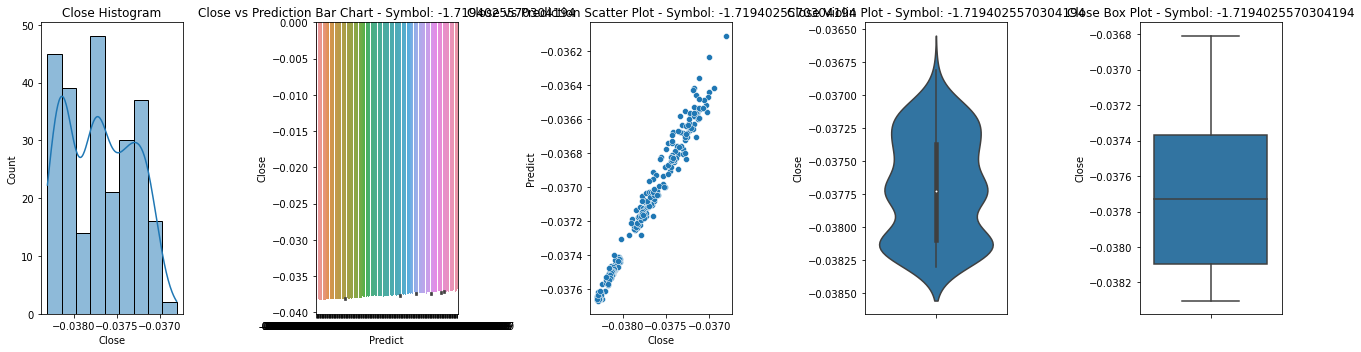

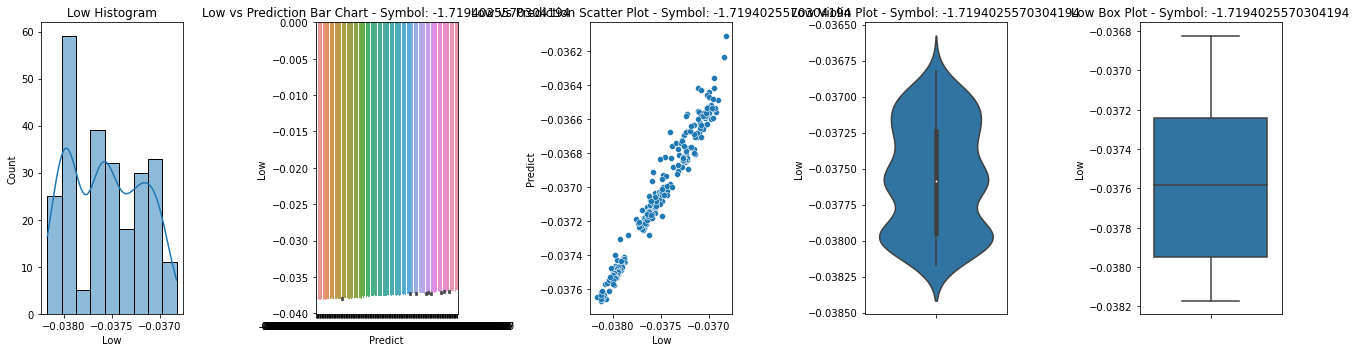

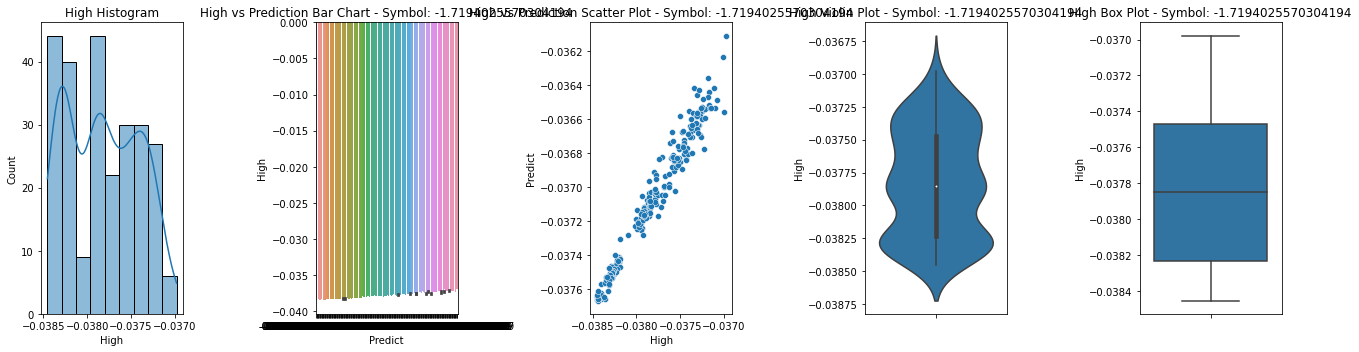

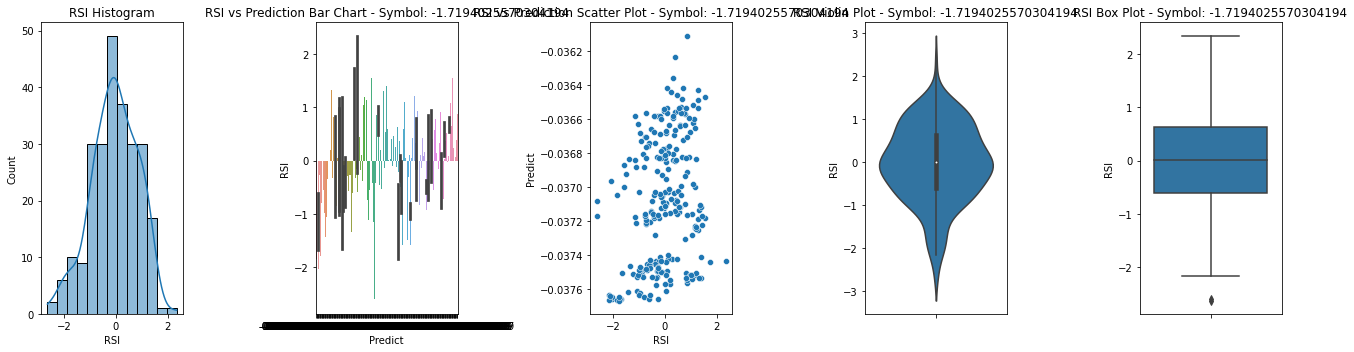

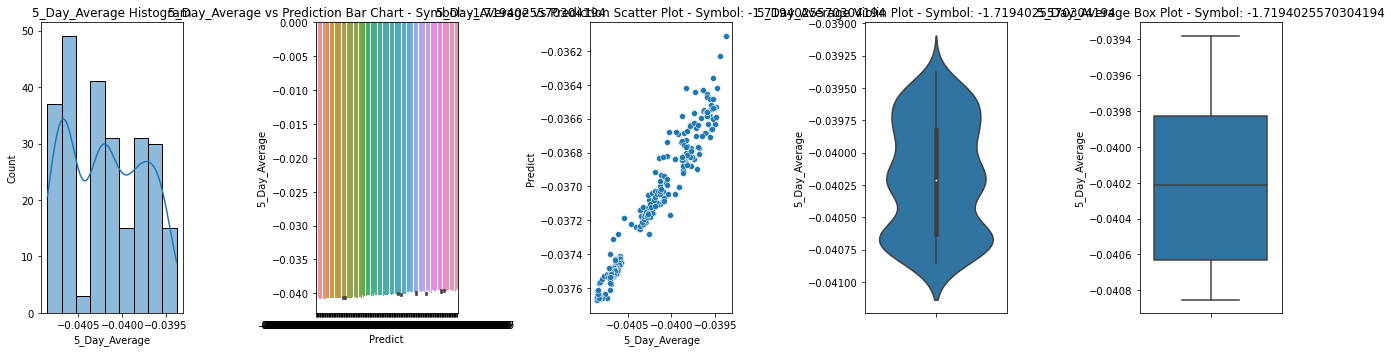

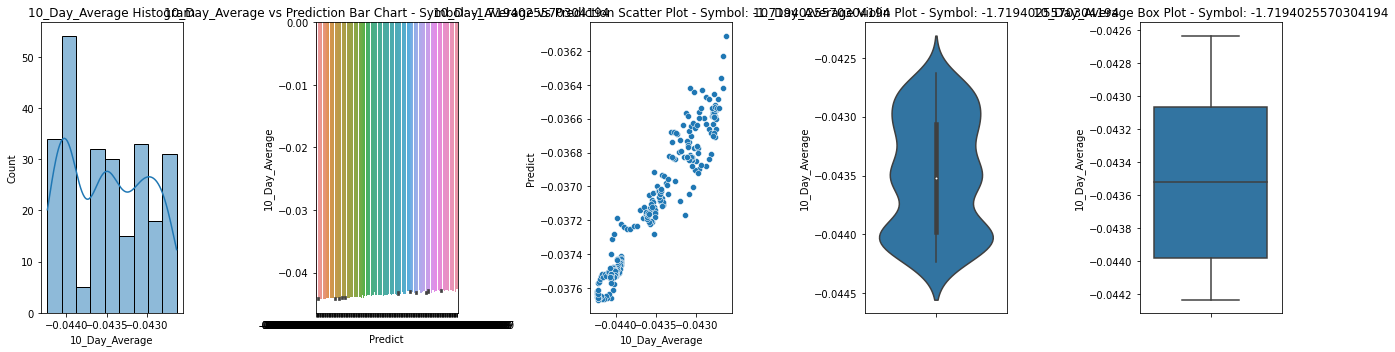

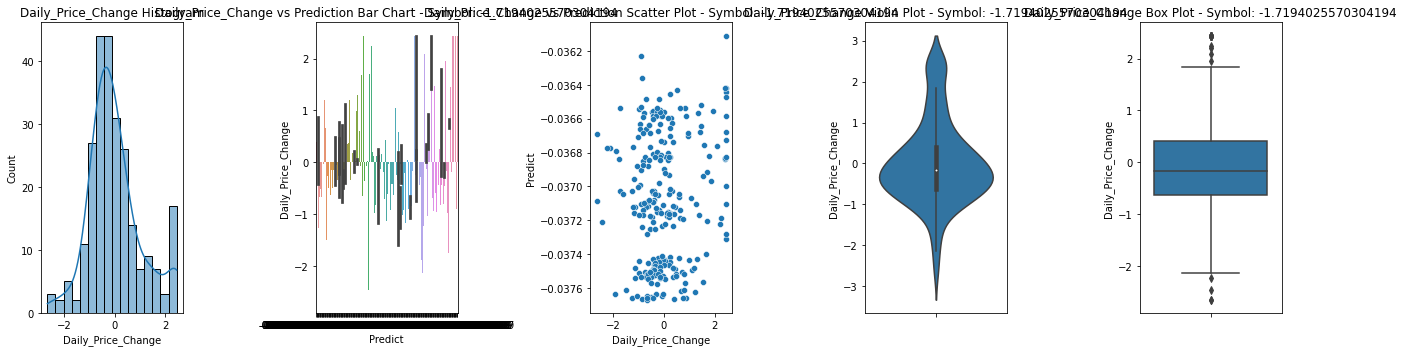

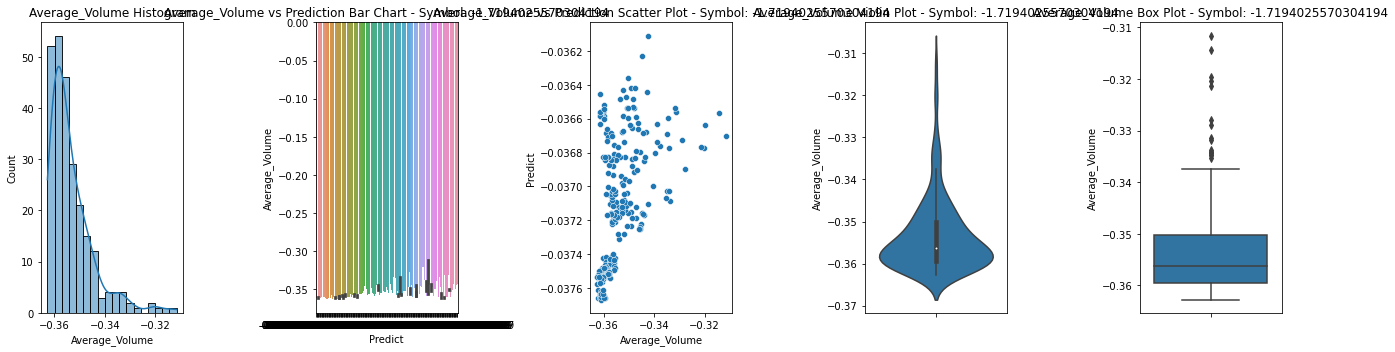

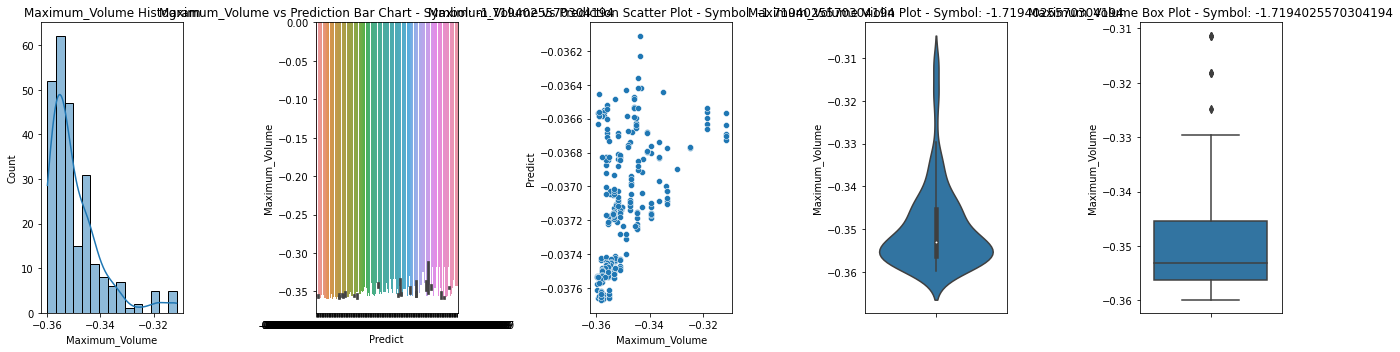

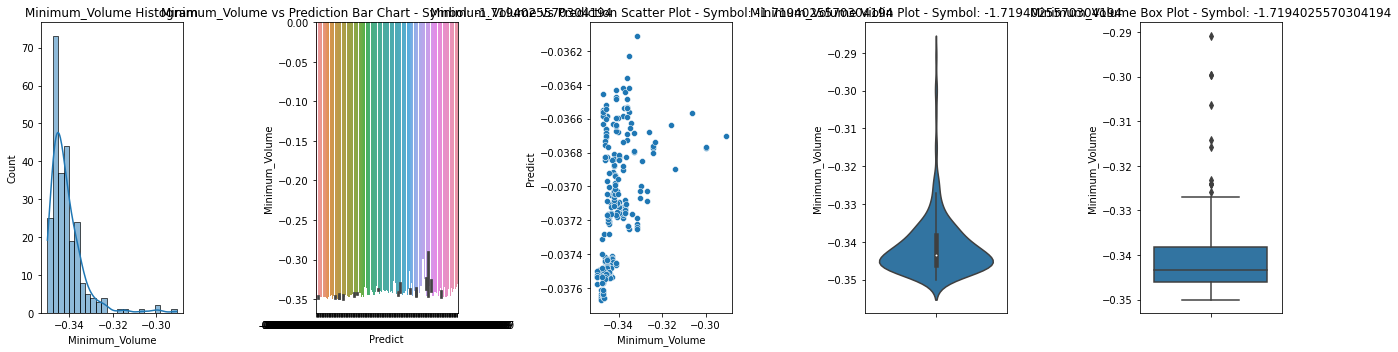

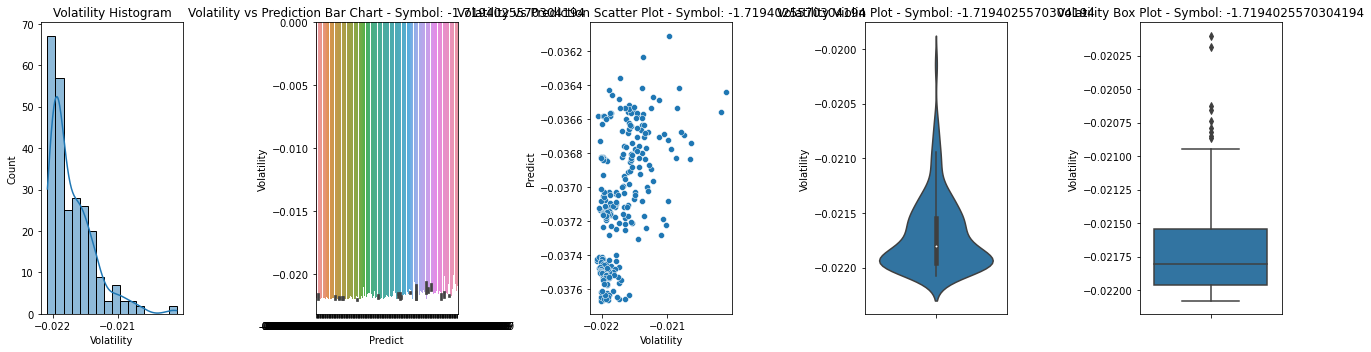

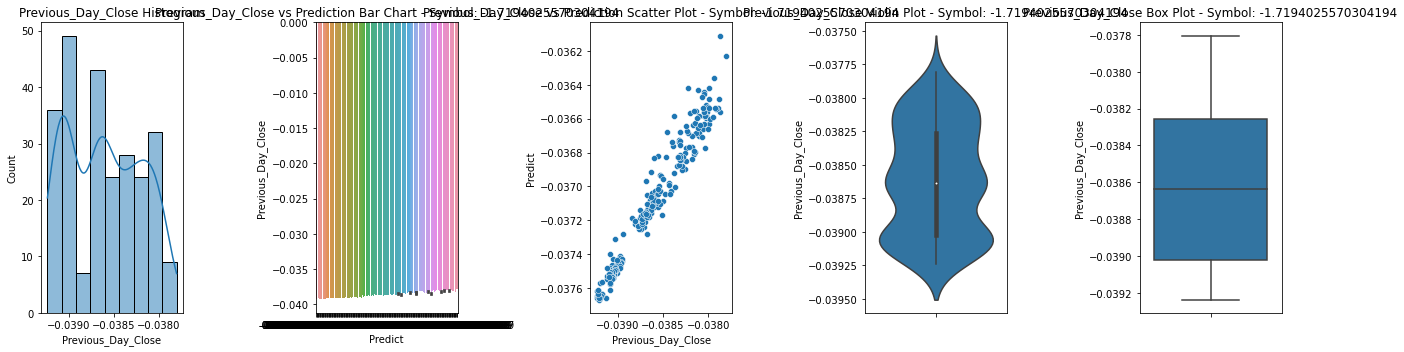

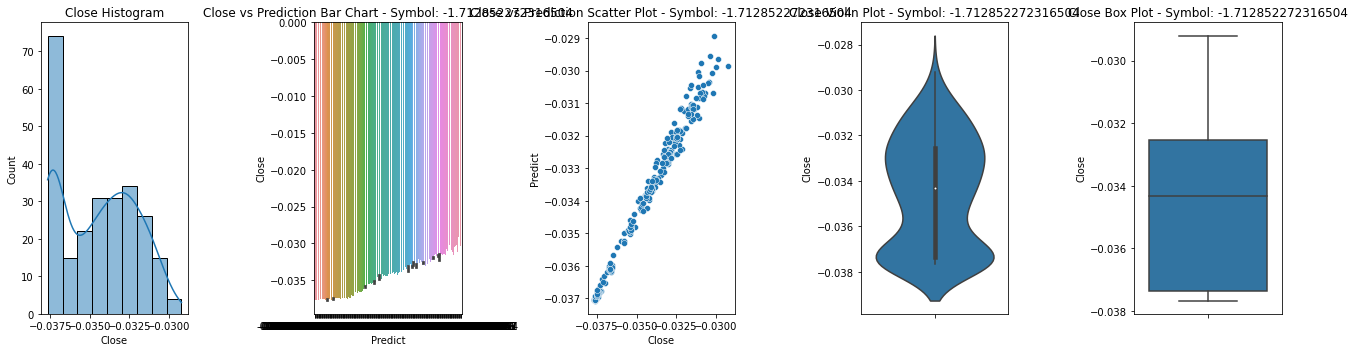

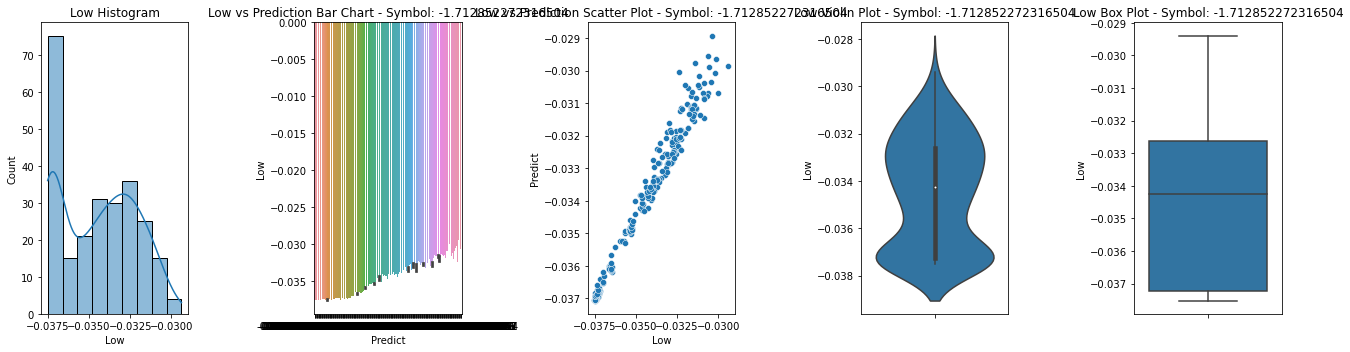

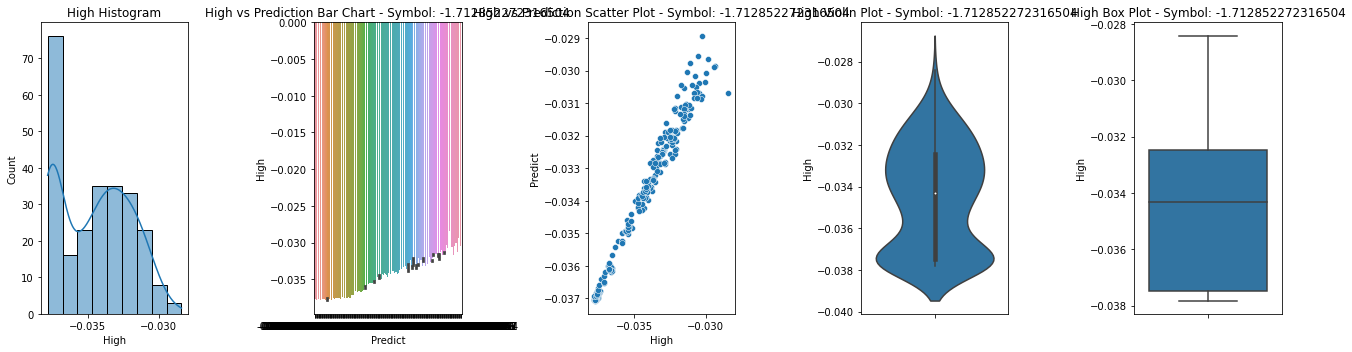

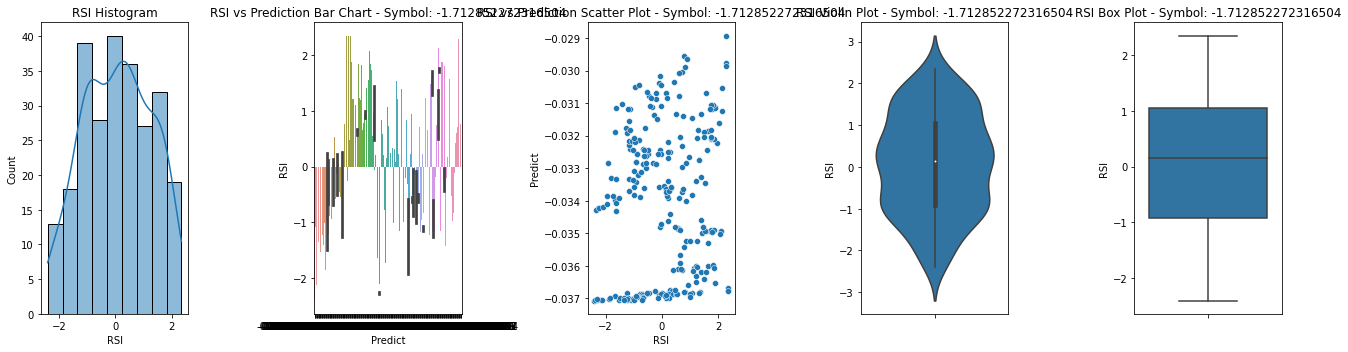

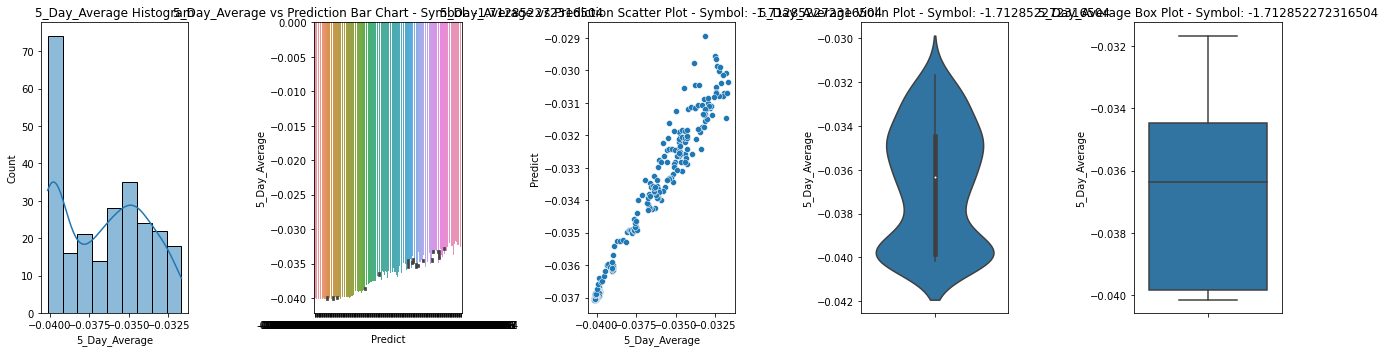

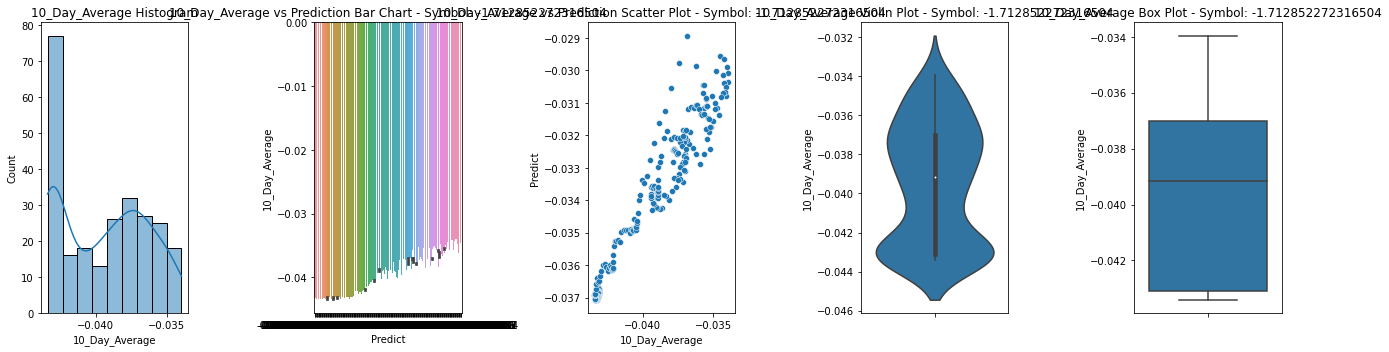

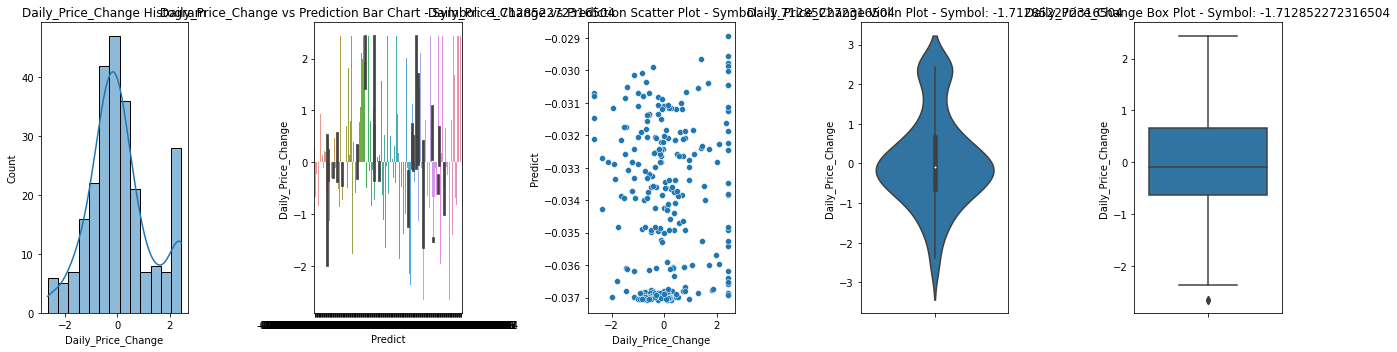

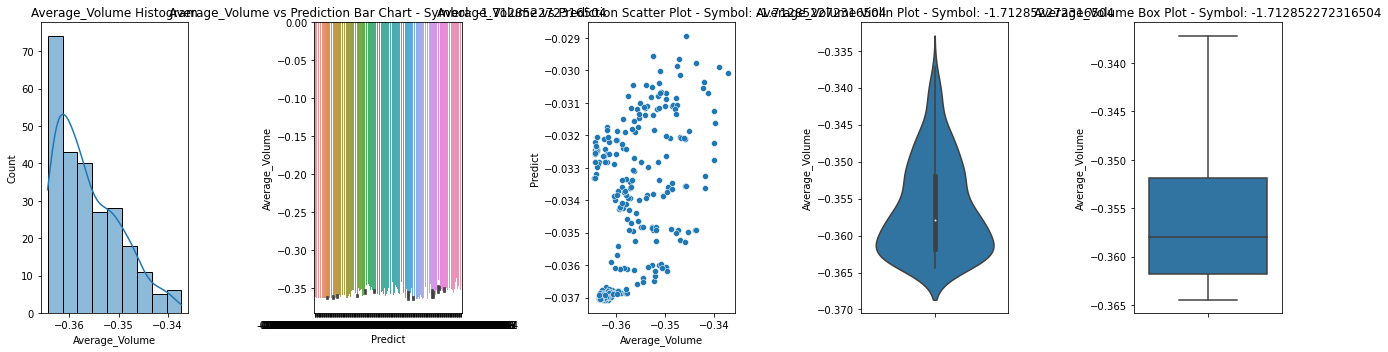

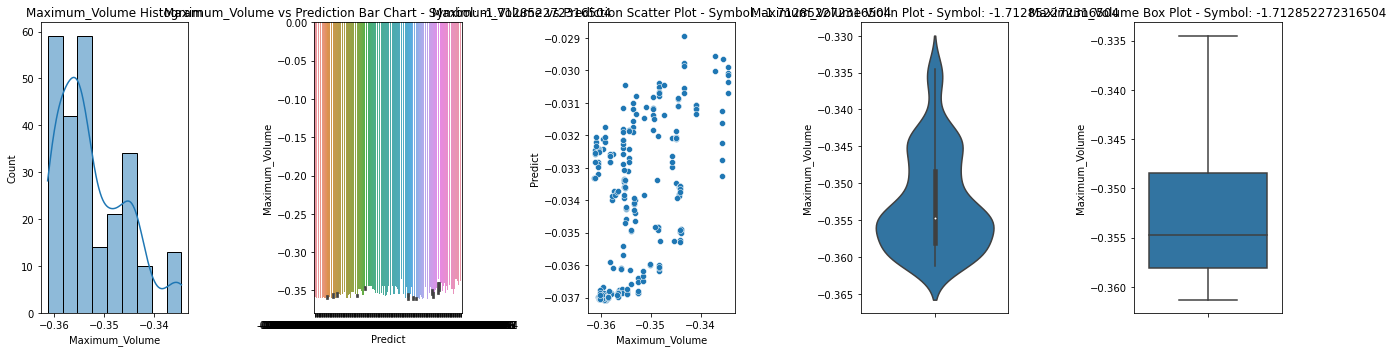

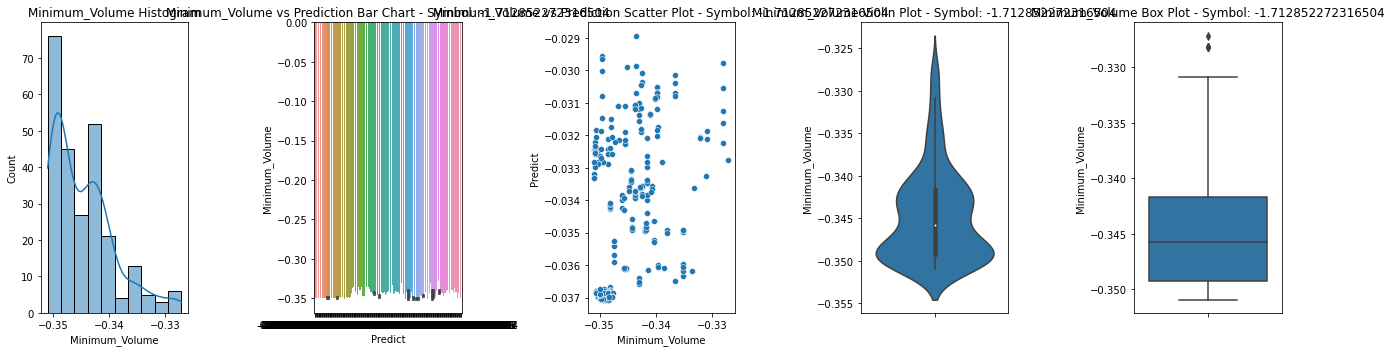

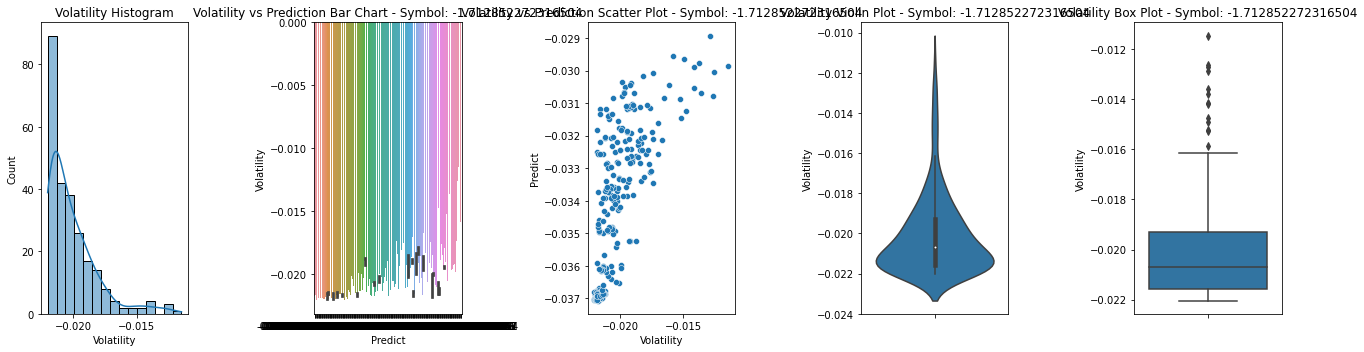

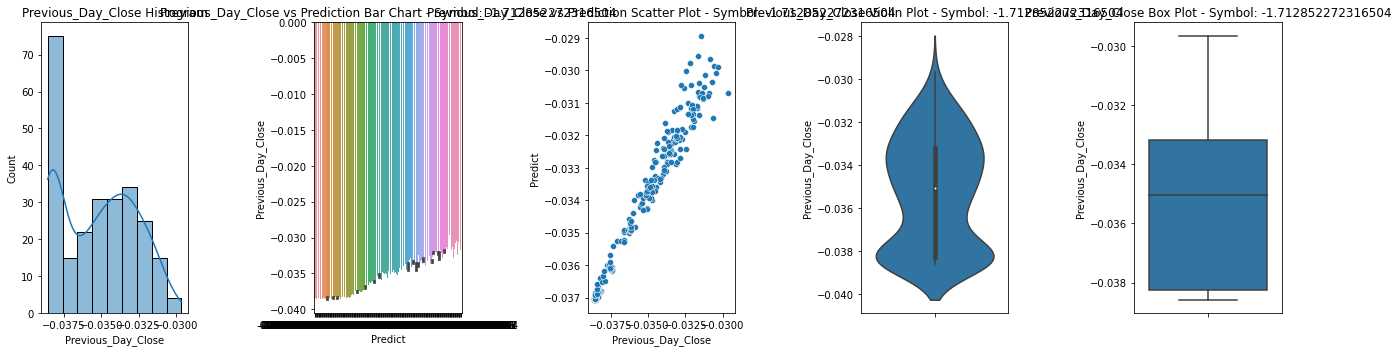

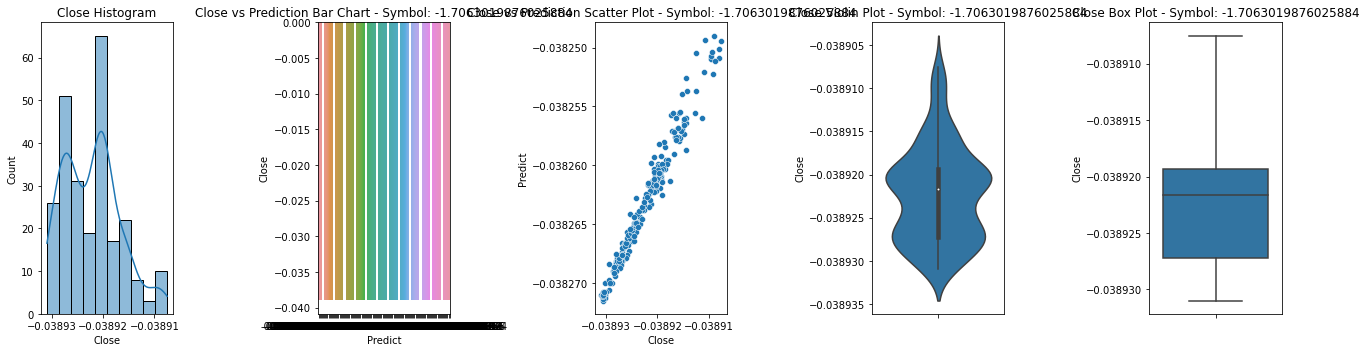

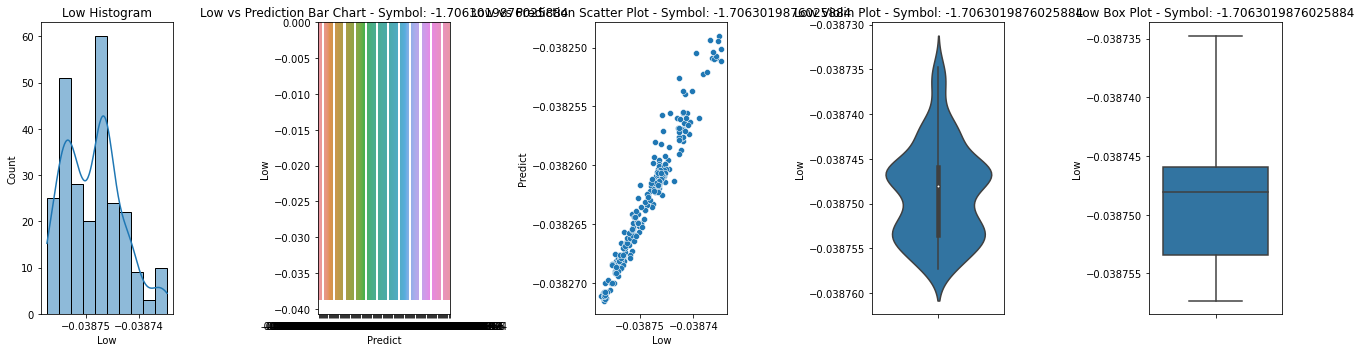

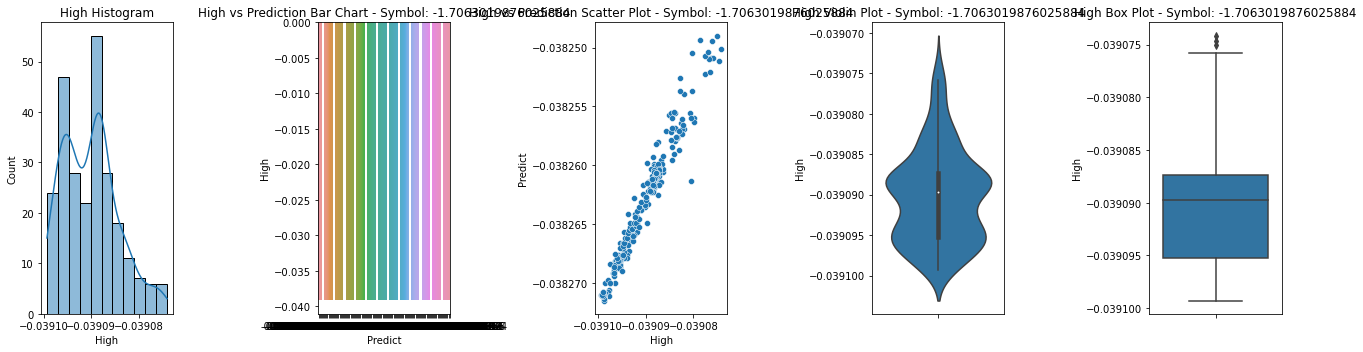

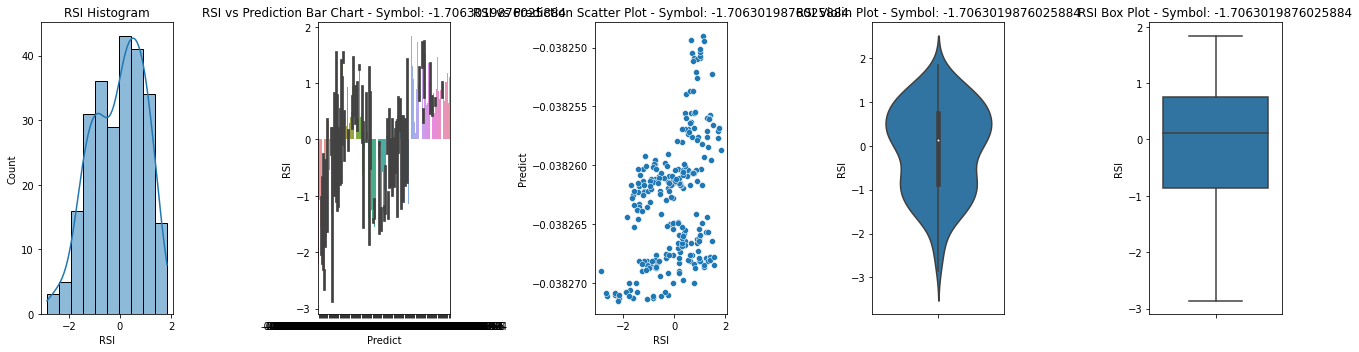

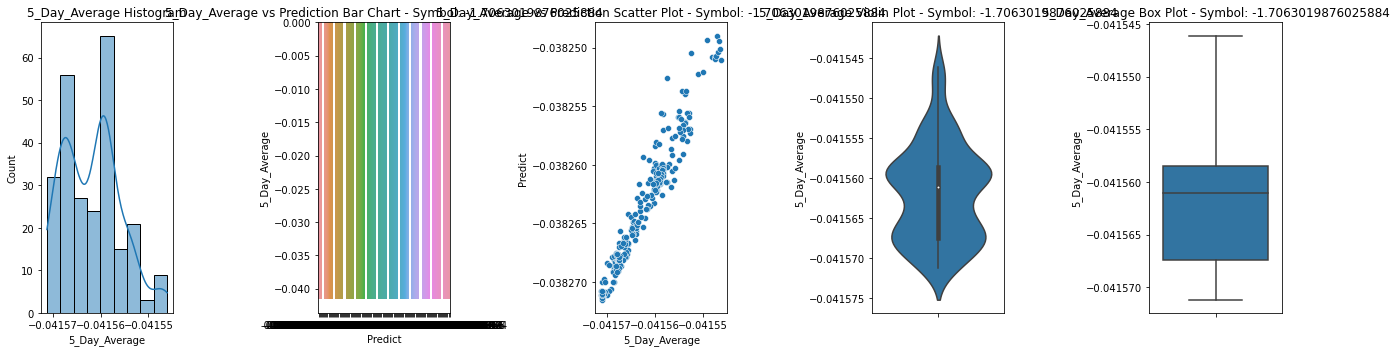

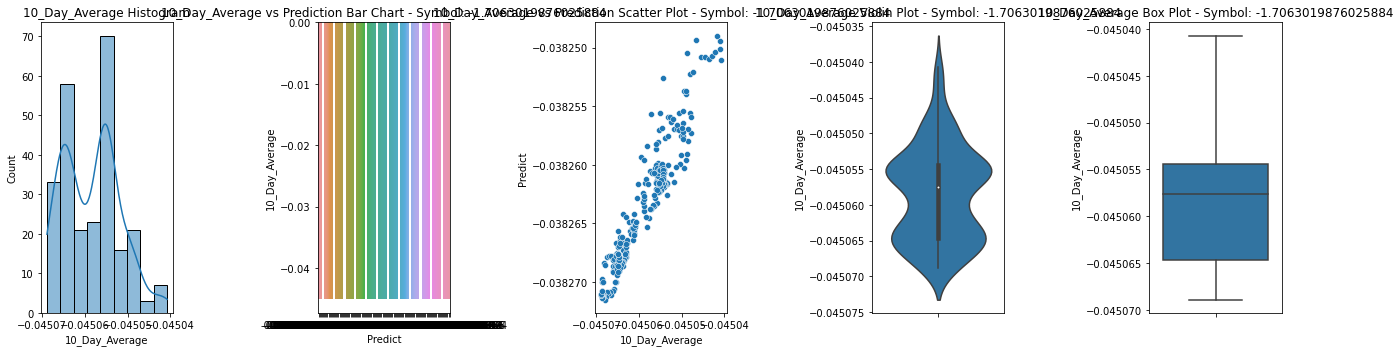

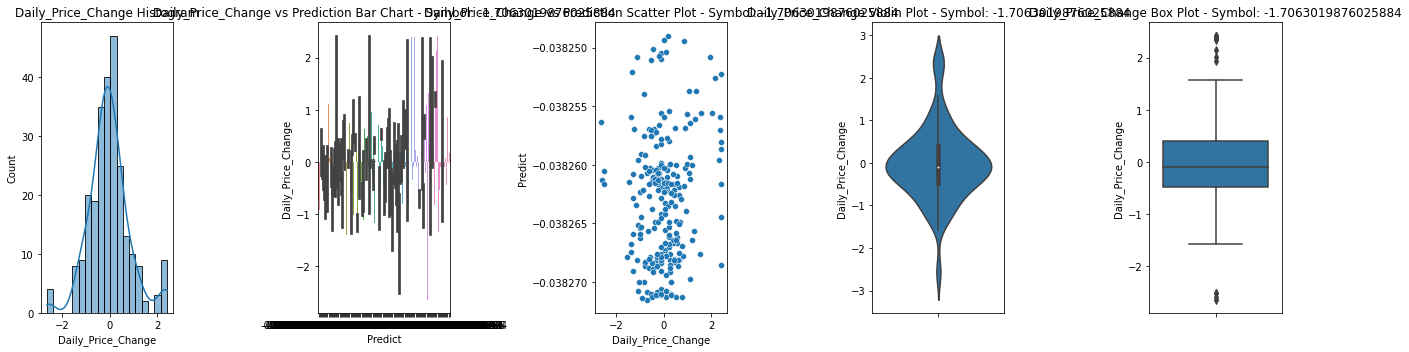

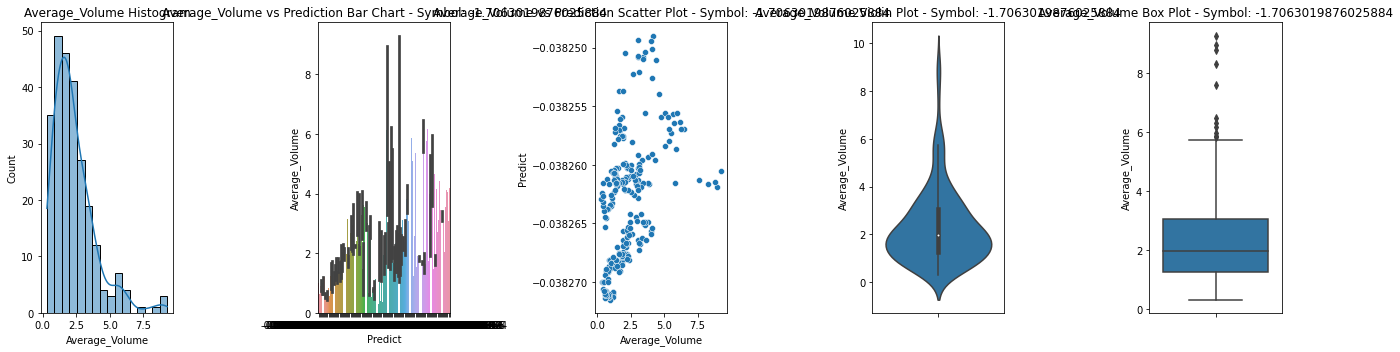

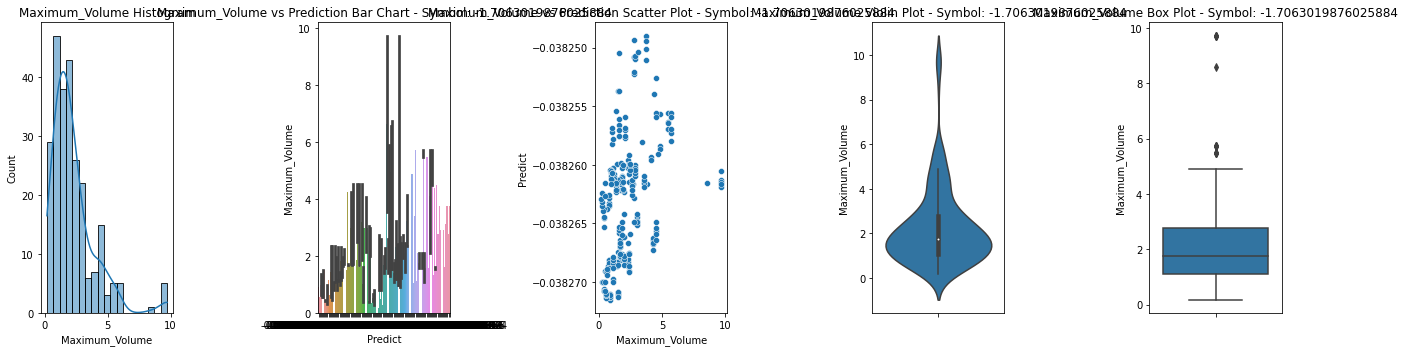

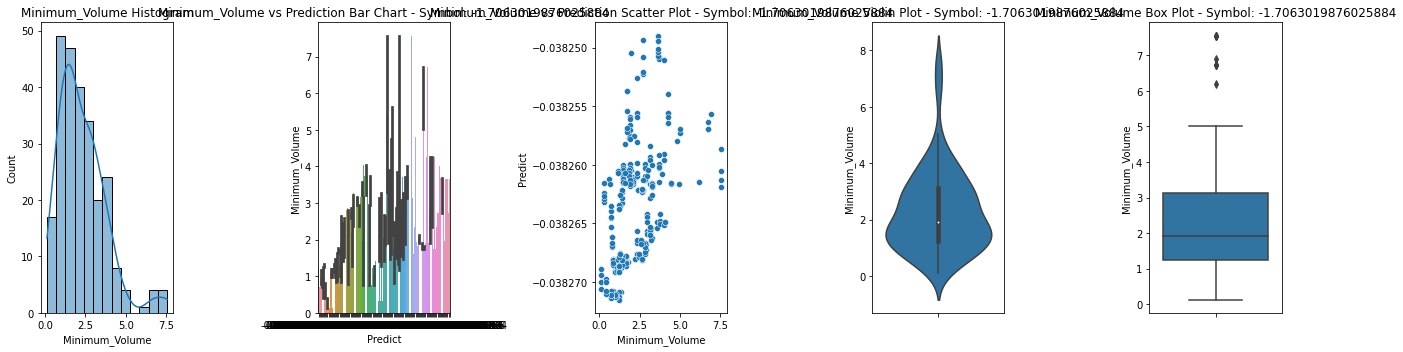

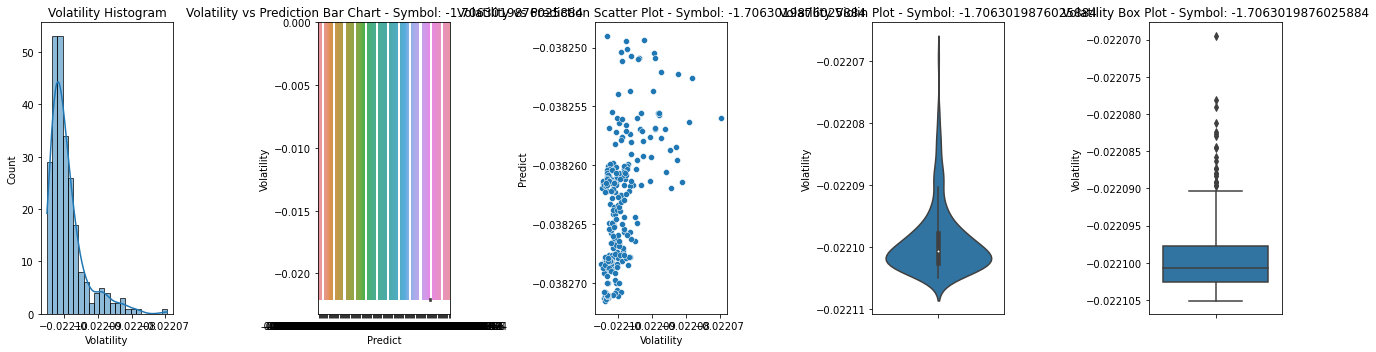

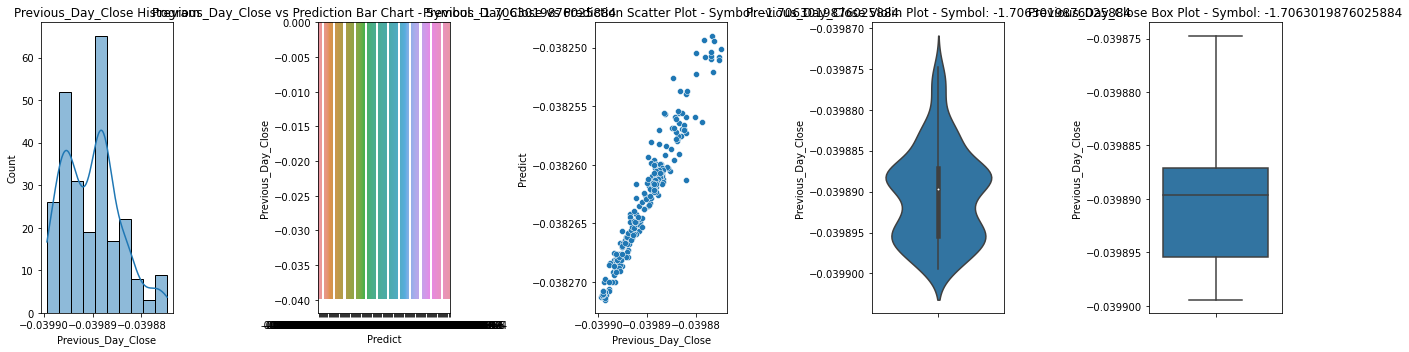

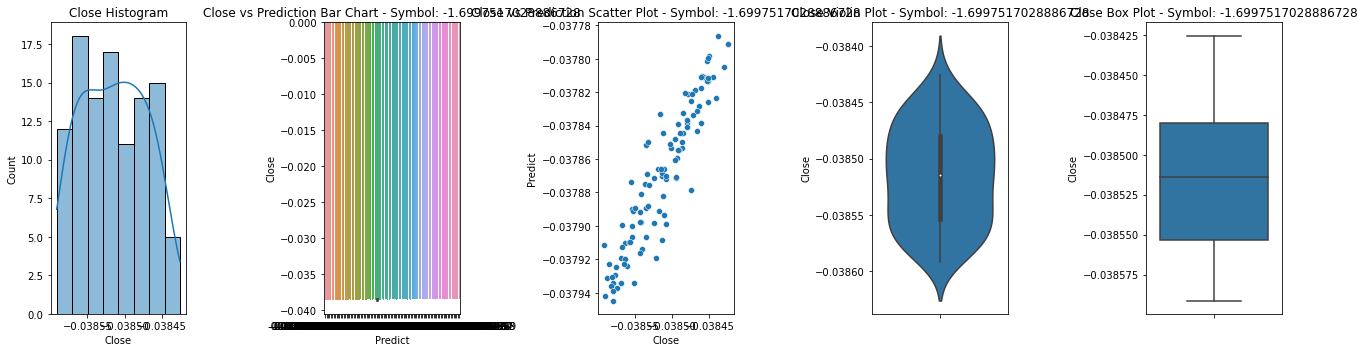

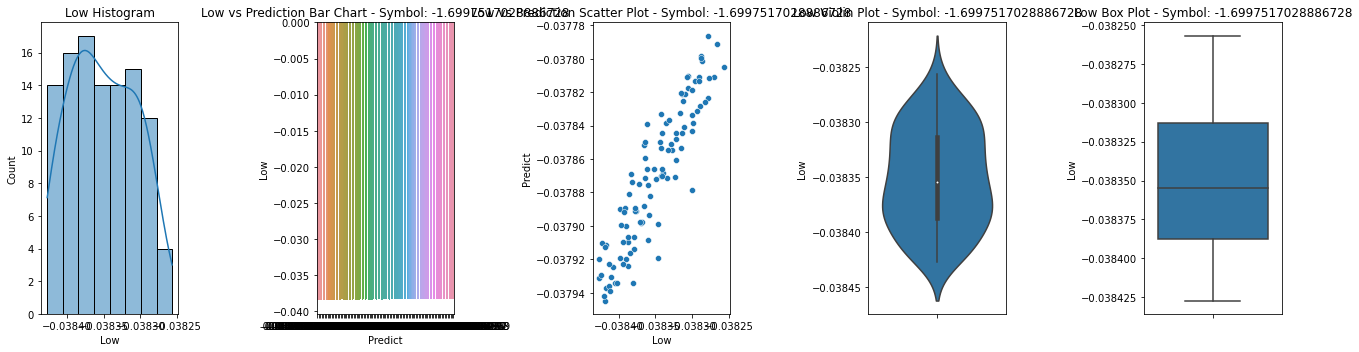

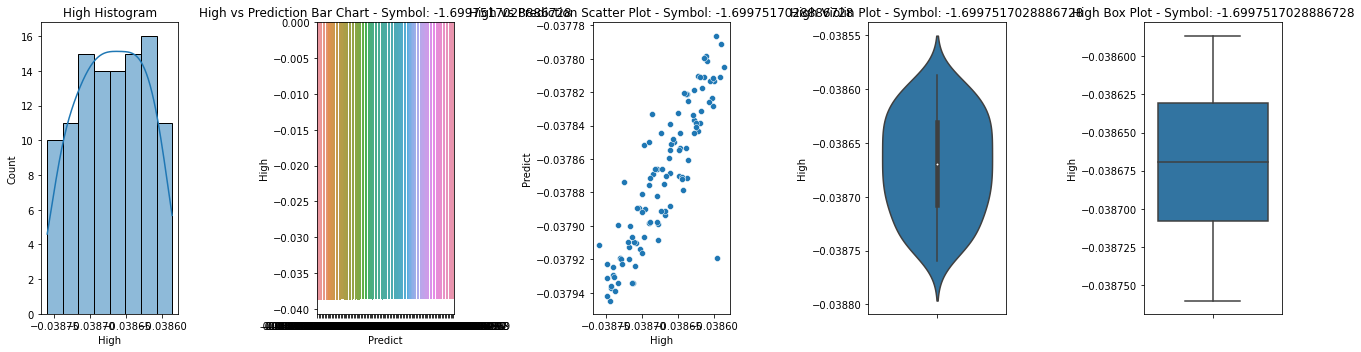

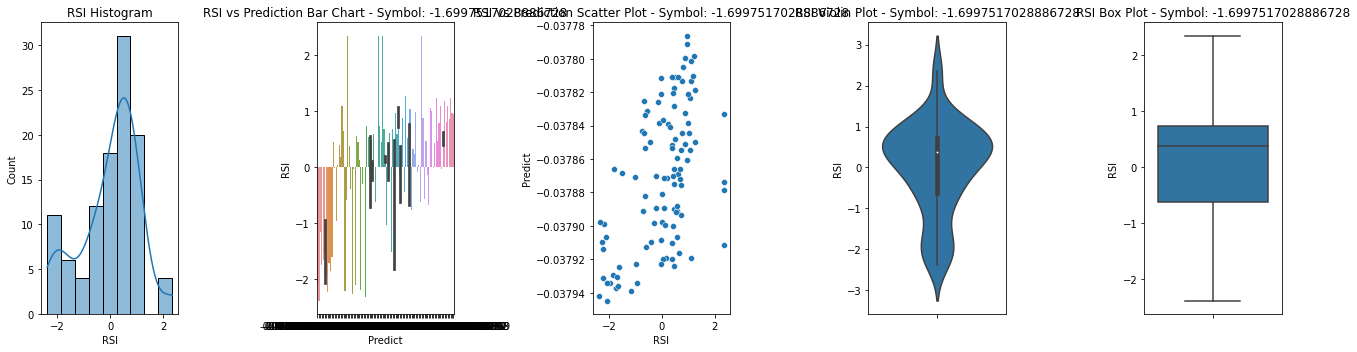

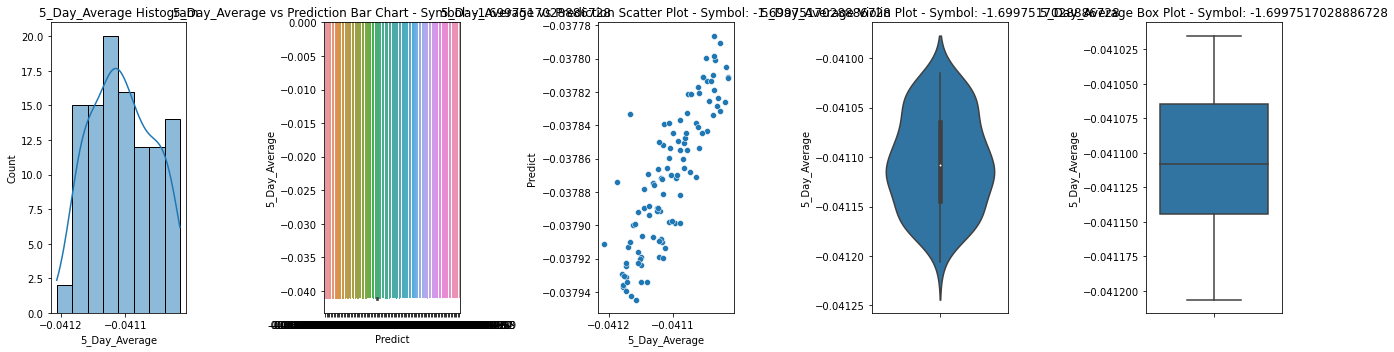

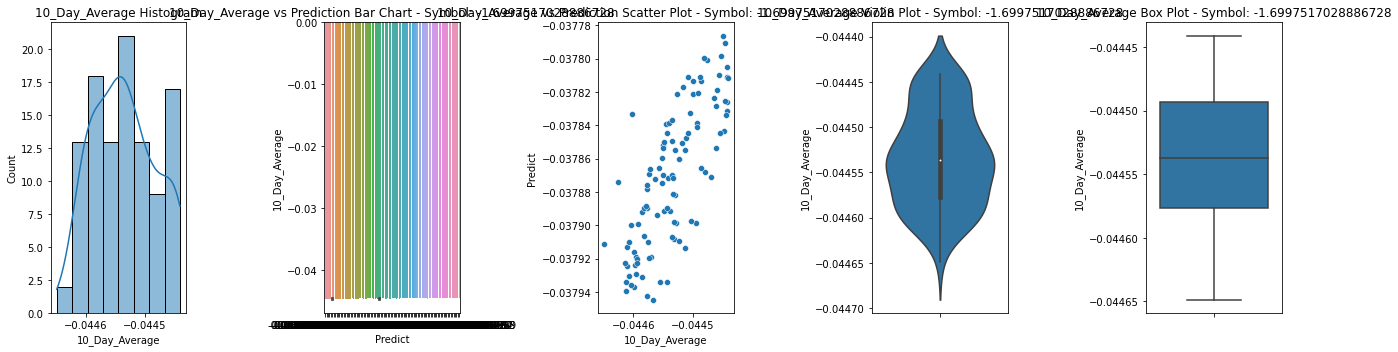

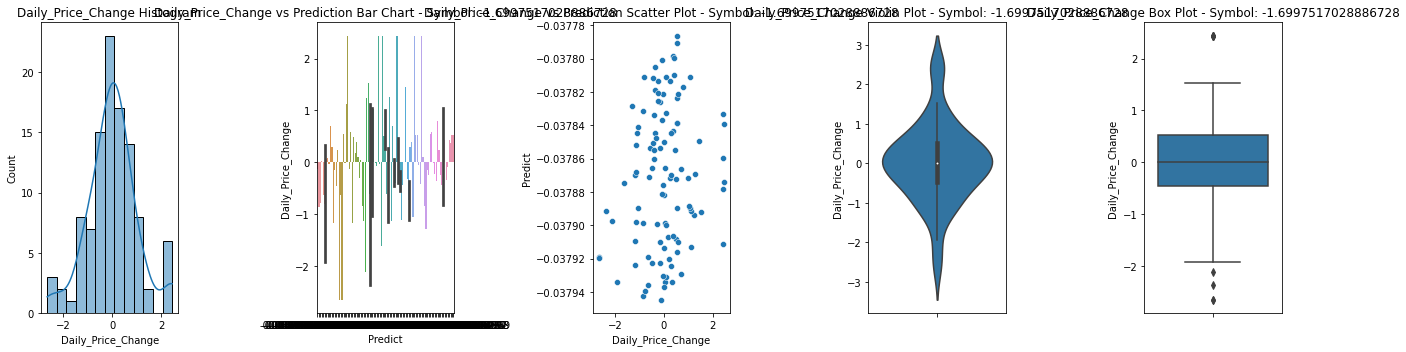

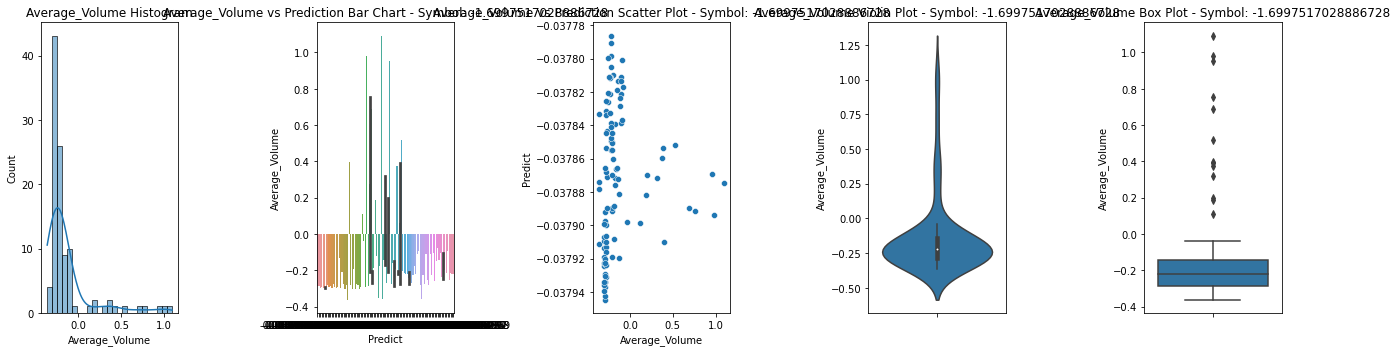

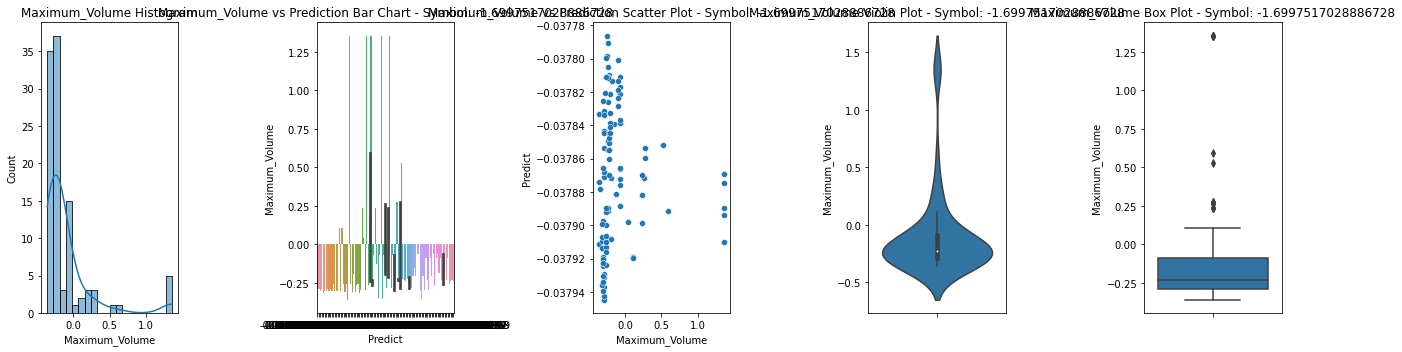

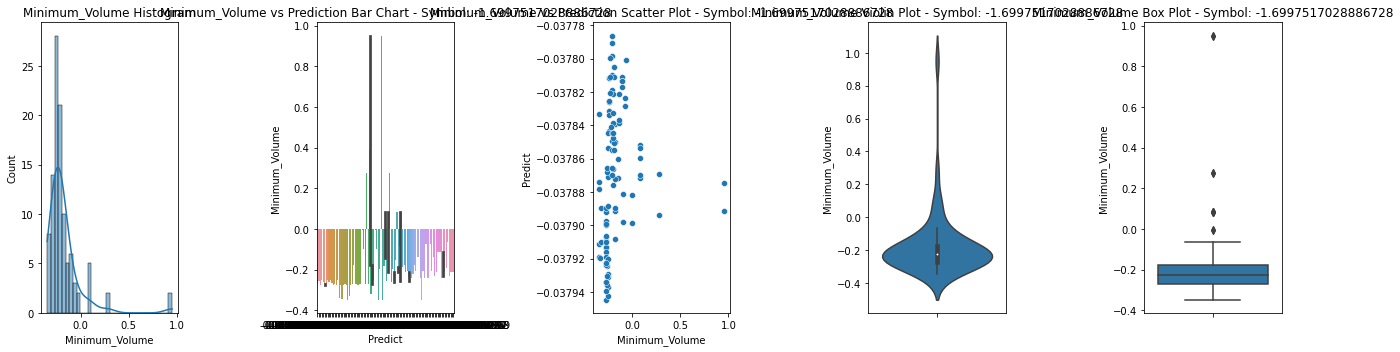

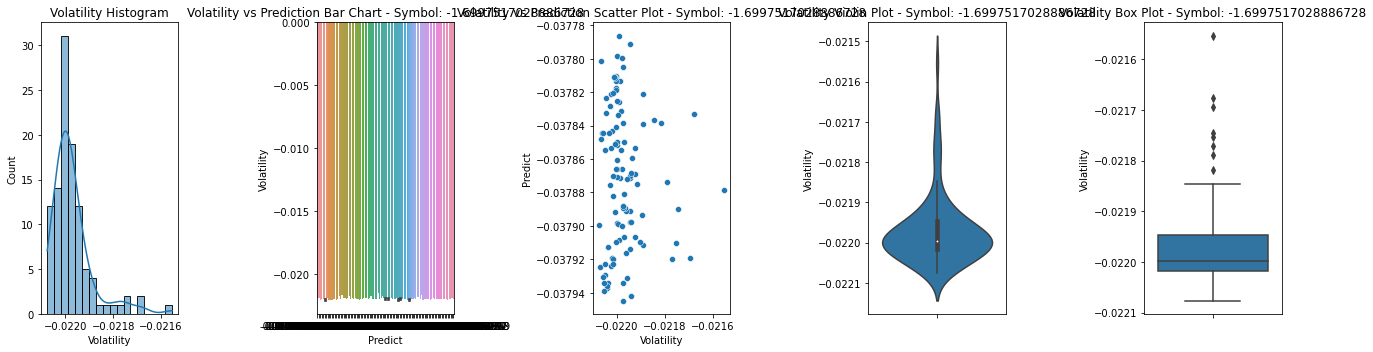

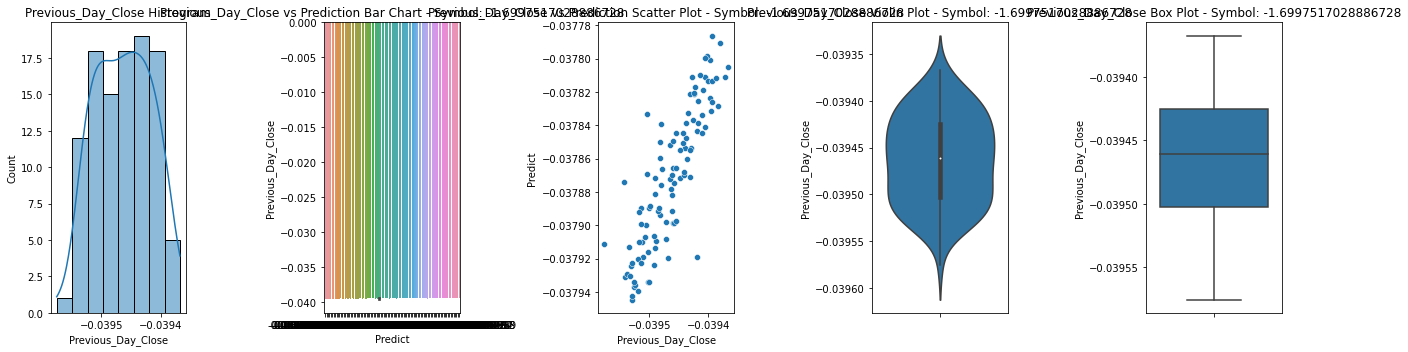

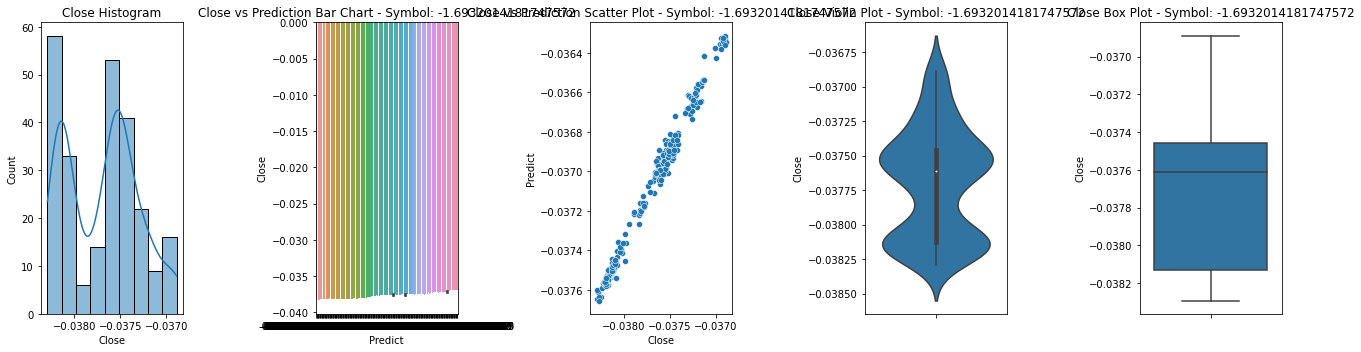

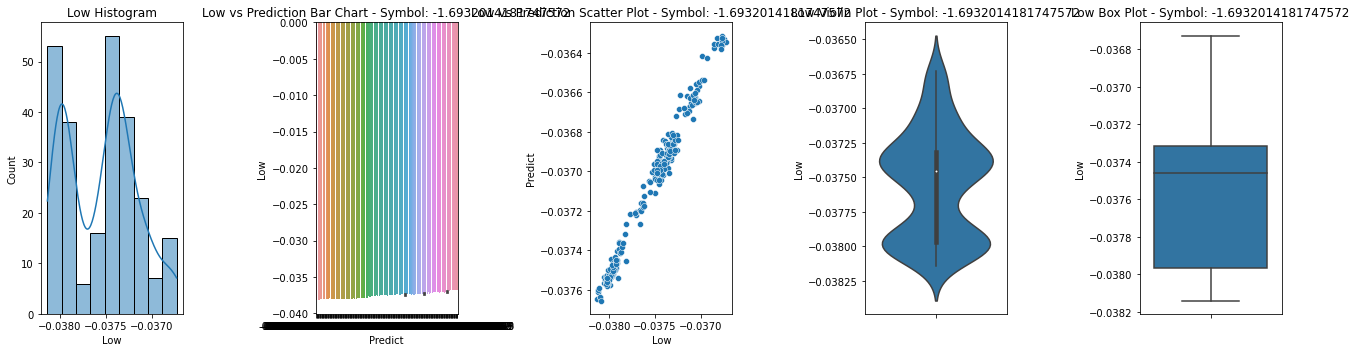

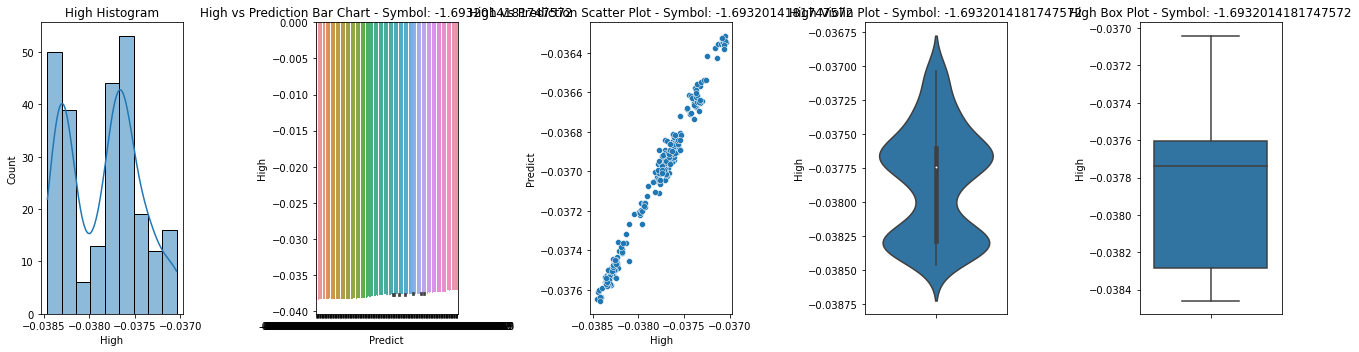

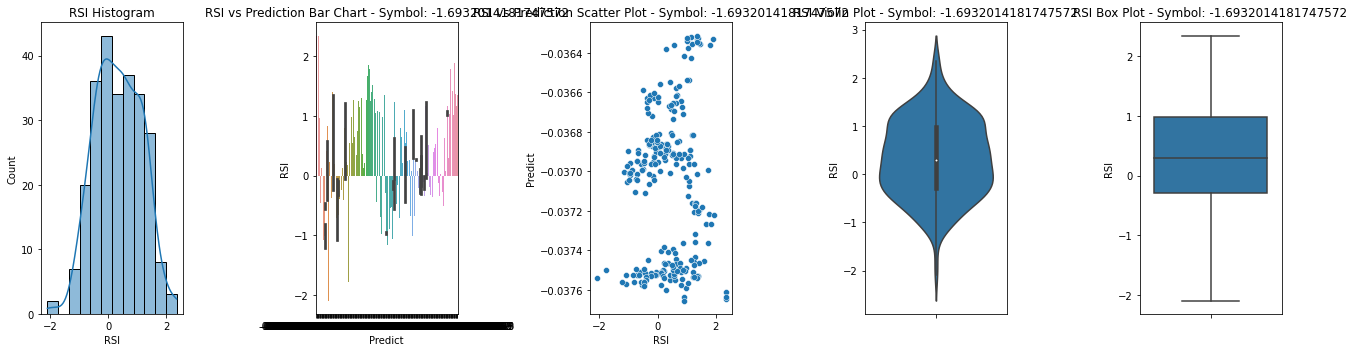

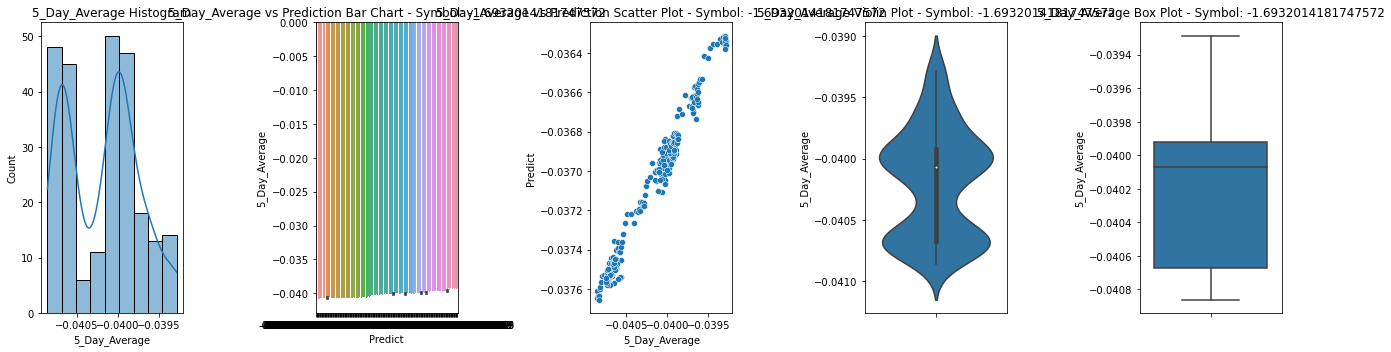

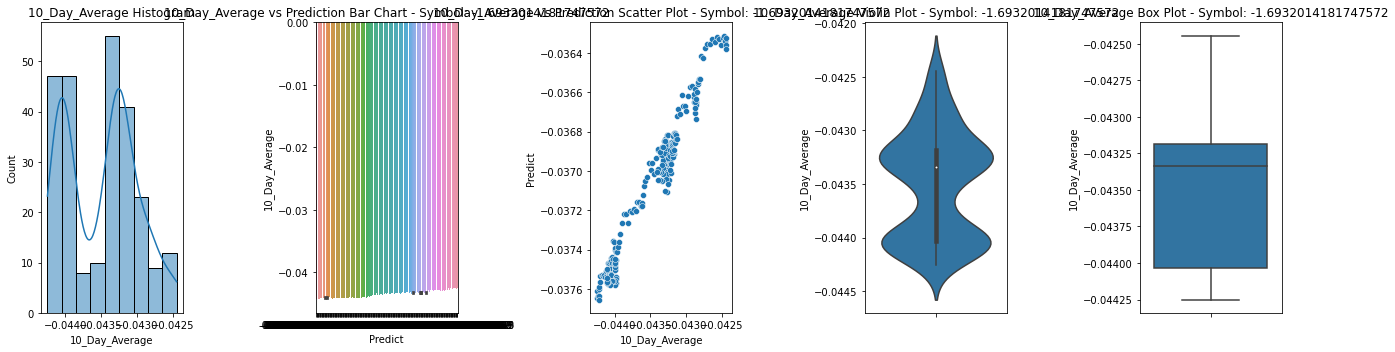

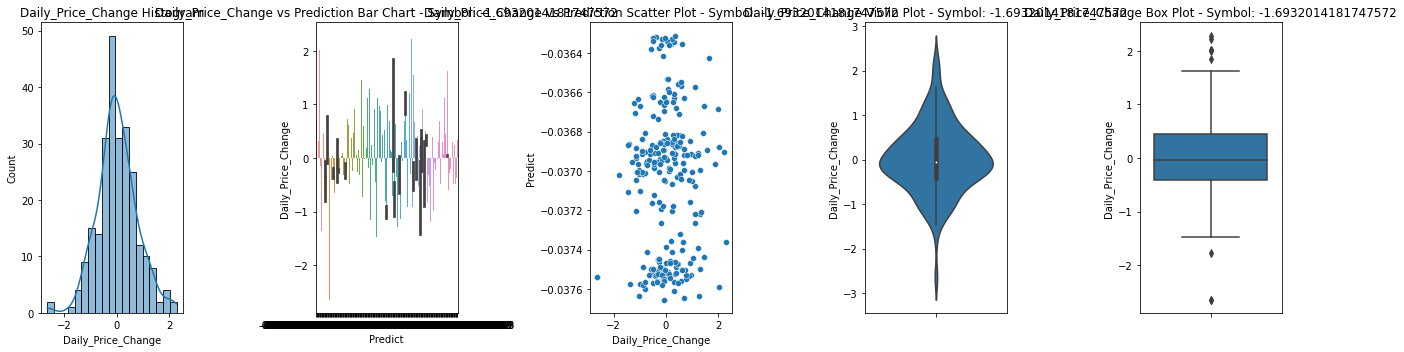

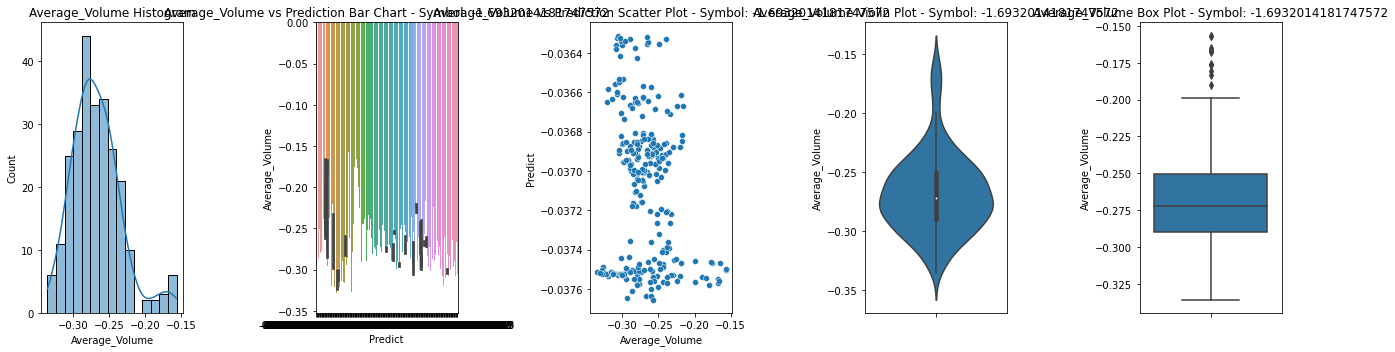

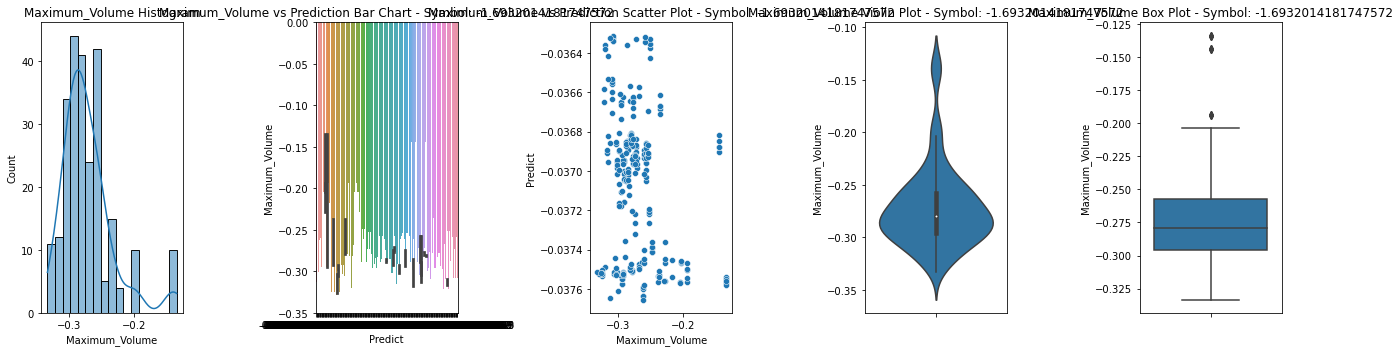

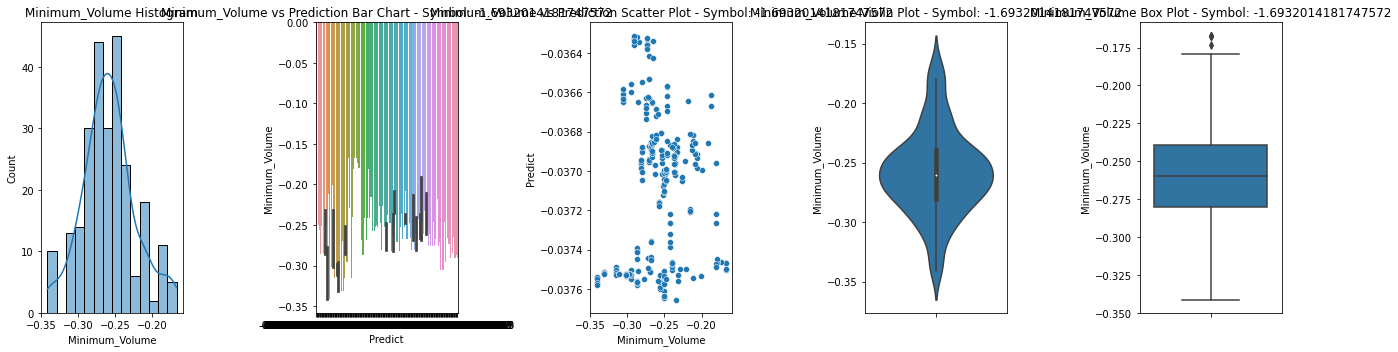

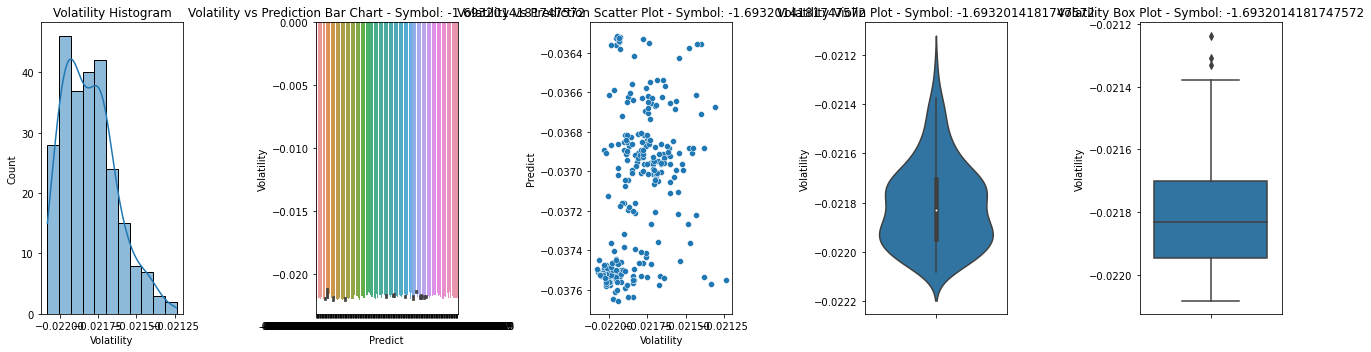

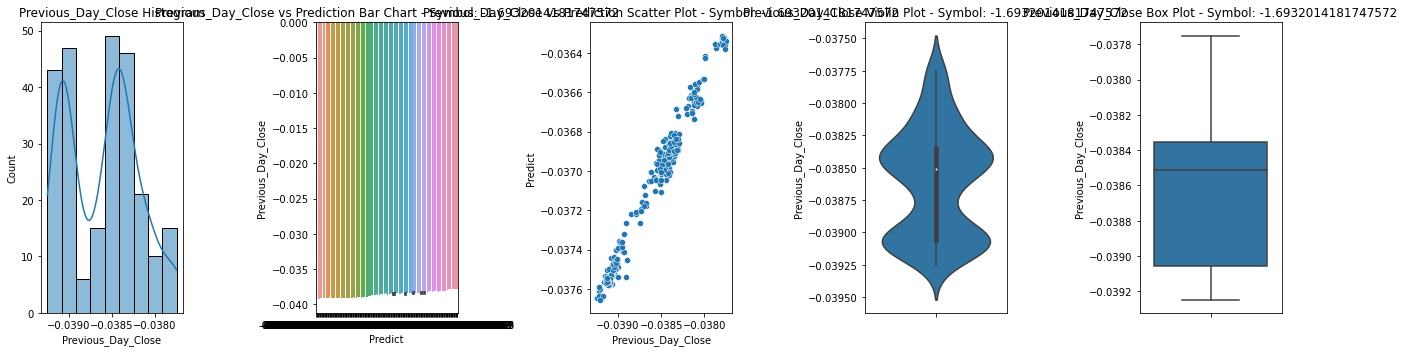

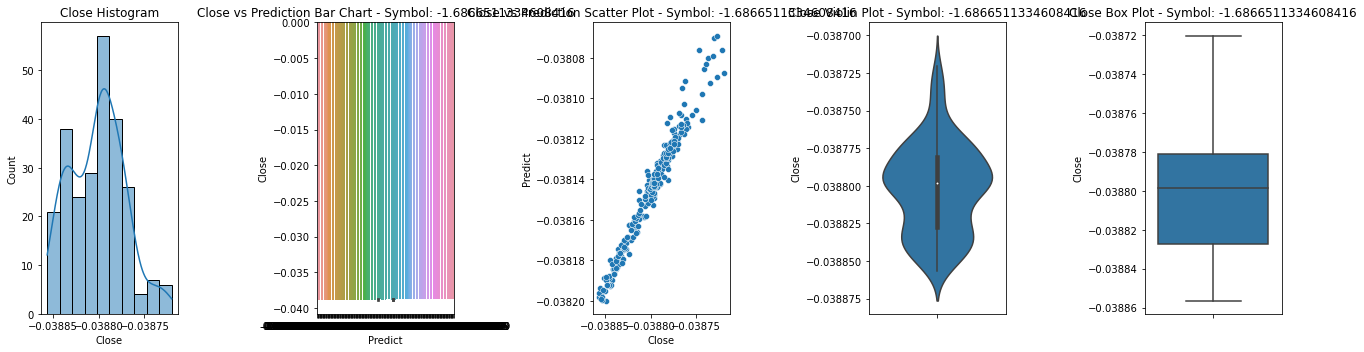

KeyboardInterrupt: 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
df = pd.read_csv("standardized_isedataset.csv")

# 'Symbol_Encoded' sütunundaki benzersiz sembollerin listesini alın
symbols = df['Symbol_Encoded'].unique()

# Her sembol için girdileri ile 'Predict' sütununu karşılaştıran grafikler oluşturun
for symbol in symbols:
    symbol_df = df[df['Symbol_Encoded'] == symbol]
    
    # Sembol için girdileri seçin
    input_cols = ['Close', 'Low', 'High', 'RSI','5_Day_Average','10_Day_Average','Daily_Price_Change'
                  ,'Average_Volume','Maximum_Volume','Minimum_Volume','Volatility','Previous_Day_Close']
    
    # Her bir girdi sütunu için grafikler oluşturun
    for column in input_cols:
        plt.figure(figsize=(18, 5)) 
        
        # Histogram
        plt.subplot(1, 5, 1)
        sns.histplot(symbol_df[column], kde=True)
        plt.title(f"{column} Histogram")
        
        # Bar Grafik
        plt.subplot(1, 5, 2)
        sns.barplot(x='Predict', y=column, data=symbol_df)
        plt.title(f"{column} vs Prediction Bar Chart - Symbol: {symbol}")
        
        # Scatter Plot
        plt.subplot(1, 5, 3)
        sns.scatterplot(x=column, y='Predict', data=symbol_df)
        plt.title(f"{column} vs Prediction Scatter Plot - Symbol: {symbol}")
        
        # Violin Plot
        plt.subplot(1, 5, 4)
        sns.violinplot(y=column, data=symbol_df)
        plt.title(f"{column} Violin Plot - Symbol: {symbol}")
        
        # Box Plot
        plt.subplot(1, 5, 5)
        sns.boxplot(y=column, data=symbol_df)
        plt.title(f"{column} Box Plot - Symbol: {symbol}")
        
        plt.tight_layout()
        plt.show()


Since I printed the graphics separately for each symbol, I printed out a few samples and stopped them.

Model

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import joblib
import pandas as pd

# Veri setini yükle
data = pd.read_csv("standardized_isedataset.csv")

# Her bir sembolden eşit sayıda veri almak için veriyi sembollere göre grupla
grouped_data = data.groupby('Symbol_Encoded')
grouped_data = pd.DataFrame(grouped_data.apply(lambda x: x.sample(grouped_data.size().min()).reset_index(drop=True)))

# Bağımsız değişkenler ve hedef değişkeni ayır
X = grouped_data.drop(columns=["Predict"])
y = grouped_data["Predict"]

# Model tanımları
models = {
    "Simple Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor()
}

best_model_name = None
best_score = -1

# Modelleri değerlendir, veri setini bölebilir ve hem ortalama R^2 hem de test R^2 değerlerini yazdır
for name, model in models.items():
    # Veri setini test etmek için bölelim
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Çapraz doğrulama ile modeli değerlendir
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    mean_score = np.mean(scores)
    
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
        
    # Modeli eğitim seti üzerinde eğit
    model.fit(X_train, y_train)
    
    # Test R^2 hesapla
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Eğitim R^2 hesapla
    y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Sonuçları yazdır
    print(f"{name}: Cross-validated R^2 scores: {scores}")
    print(f"{name}: Average Cross-validated R^2 score: {np.mean(scores)}")
    print(f"{name}: Test R^2 score = {r2}")
    print(f"{name}: Train R^2 score = {r2_train}")
    print("--------------------------------------")

# En iyi modeli seç
best_model = models[best_model_name]

# En iyi modeli eğitim seti üzerinde eğit
best_model.fit(X_train, y_train)

# En iyi modelin eğitim seti performansını hesapla
y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)

# En iyi modelin test seti performansını hesapla
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)

# En iyi modelin adını ve performansını yazdır
print(f"The best model is: {best_model_name}, Average cross-validation R^2: {best_score}")
print(f"The best model is ({best_model_name}): Train R^2 score = {r2_train_best}, Test R^2 score = {r2_best}")

# En iyi modeli diske kaydet
joblib.dump(best_model, 'Best_Model.pkl')


Simple Linear Regression: Cross-validated R^2 scores: [0.99957118 0.99864285 0.9967277  0.99989179 0.99986738 0.99930626
 0.99892652 0.99991406 0.99987594 0.99415999]
Simple Linear Regression: Average Cross-validated R^2 score: 0.9986883660169404
Simple Linear Regression: Test R^2 score = 0.9750645913388394
Simple Linear Regression: Train R^2 score = 0.9996791190684872
--------------------------------------
Decision Tree Regression: Cross-validated R^2 scores: [0.98501935 0.99257975 0.97920722 0.99185704 0.99251042 0.9723447
 0.98772825 0.8459658  0.98899607 0.98688656]
Decision Tree Regression: Average Cross-validated R^2 score: 0.9723095155955346
Decision Tree Regression: Test R^2 score = 0.9943272051054185
Decision Tree Regression: Train R^2 score = 1.0
--------------------------------------
Random Forest Regression: Cross-validated R^2 scores: [0.9952095  0.99572558 0.99502023 0.97396329 0.99920019 0.99651583
 0.99470927 0.98587237 0.9973261  0.99526298]
Random Forest Regression: A

['Best_Model.pkl']